# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
import matplotlib
from past.builtins import xrange
from textwrap import wrap
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import seaborn as sns
import pickle
from matplotlib.patches import Rectangle

In [2]:
prefix   = 'E:/ML Fire/EPRI-Data/EPRI_OG/EPRI-FEDB_DA/'
plot     = 'Plots/'
old      = 'Old/'
updated_data = 'Updated Data/'
up_data_plot =  'Updated Data/Plots/'
sys_plot = os.path.join(prefix, plot)
sys_old  = os.path.join(prefix, old)
sys_up_data = os.path.join(prefix, updated_data)
sys_up_dplo = os.path.join(prefix, up_data_plot)

# Import EPRI data

**Import the EPRI updated Data**

In [3]:
EPRI_up = pd.read_excel(sys_up_data + 'EPRI_1990-2014.xlsx')

**Import Combustible Group Types in challenging Fire Events**

In [4]:
liq_et    = pd.read_pickle(sys_up_data + 'liq_et')
trans_et  = pd.read_pickle(sys_up_data + 'trans_et')
gas_et    = pd.read_pickle(sys_up_data + 'gas_et')
ins_et    = pd.read_pickle(sys_up_data + 'ins_et')
insitu_et = pd.read_pickle(sys_up_data + 'insitu_et')

# Plots

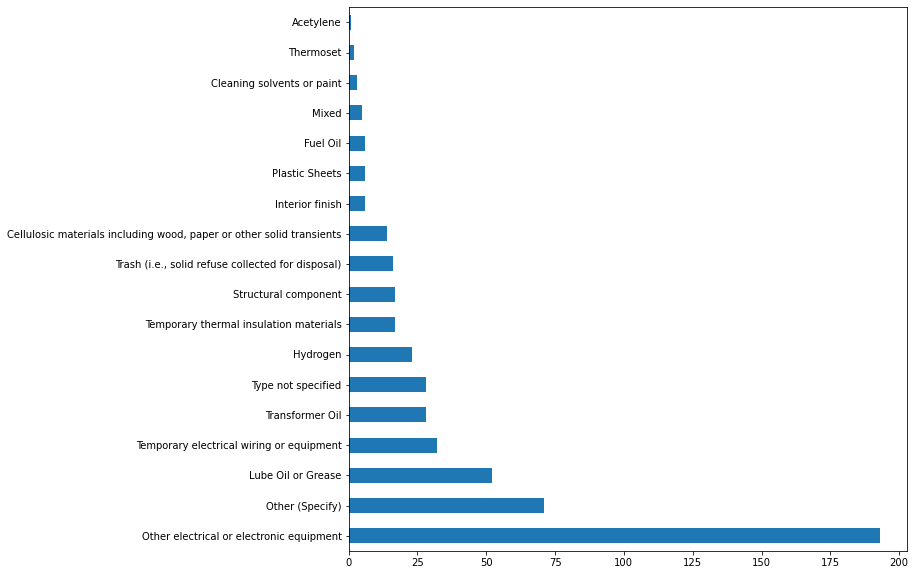

In [5]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_challenging['Type'].value_counts().plot(kind='barh', figsize = [10, 10])

In [6]:
counts_barh = df_em_challenging['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barh['percentage'] = (counts_barh['counts'] / counts_barh['counts'].sum()) * 100
counts_barh

unique_values  counts  percentage
0            Other electrical or electronic equipment     193   37.115385
1                                     Other (Specify)      71   13.653846
2                                  Lube Oil or Grease      52   10.000000
3            Temporary electrical wiring or equipment      32    6.153846
4                                     Transformer Oil      28    5.384615
5                                  Type not specified      28    5.384615
6                                            Hydrogen      23    4.423077
7              Temporary thermal insulation materials      17    3.269231
8                                Structural component      17    3.269231
9   Trash (i.e., solid refuse collected for disposal)      16    3.076923
10  Cellulosic materials including wood, paper or ...      14    2.692308
11                                    Interior finish       6    1.153846
12                                     Plastic Sheets       6    1.153846
13                                           Fuel Oil       6    1.153846
14                                              Mixed       5    0.961538
15                         Cleaning solvents or paint       3    0.576923
16                                          Thermoset       2    0.384615
17                                          Acetylene       1    0.192308

In [7]:
counts_barh['counts'].sum()

520

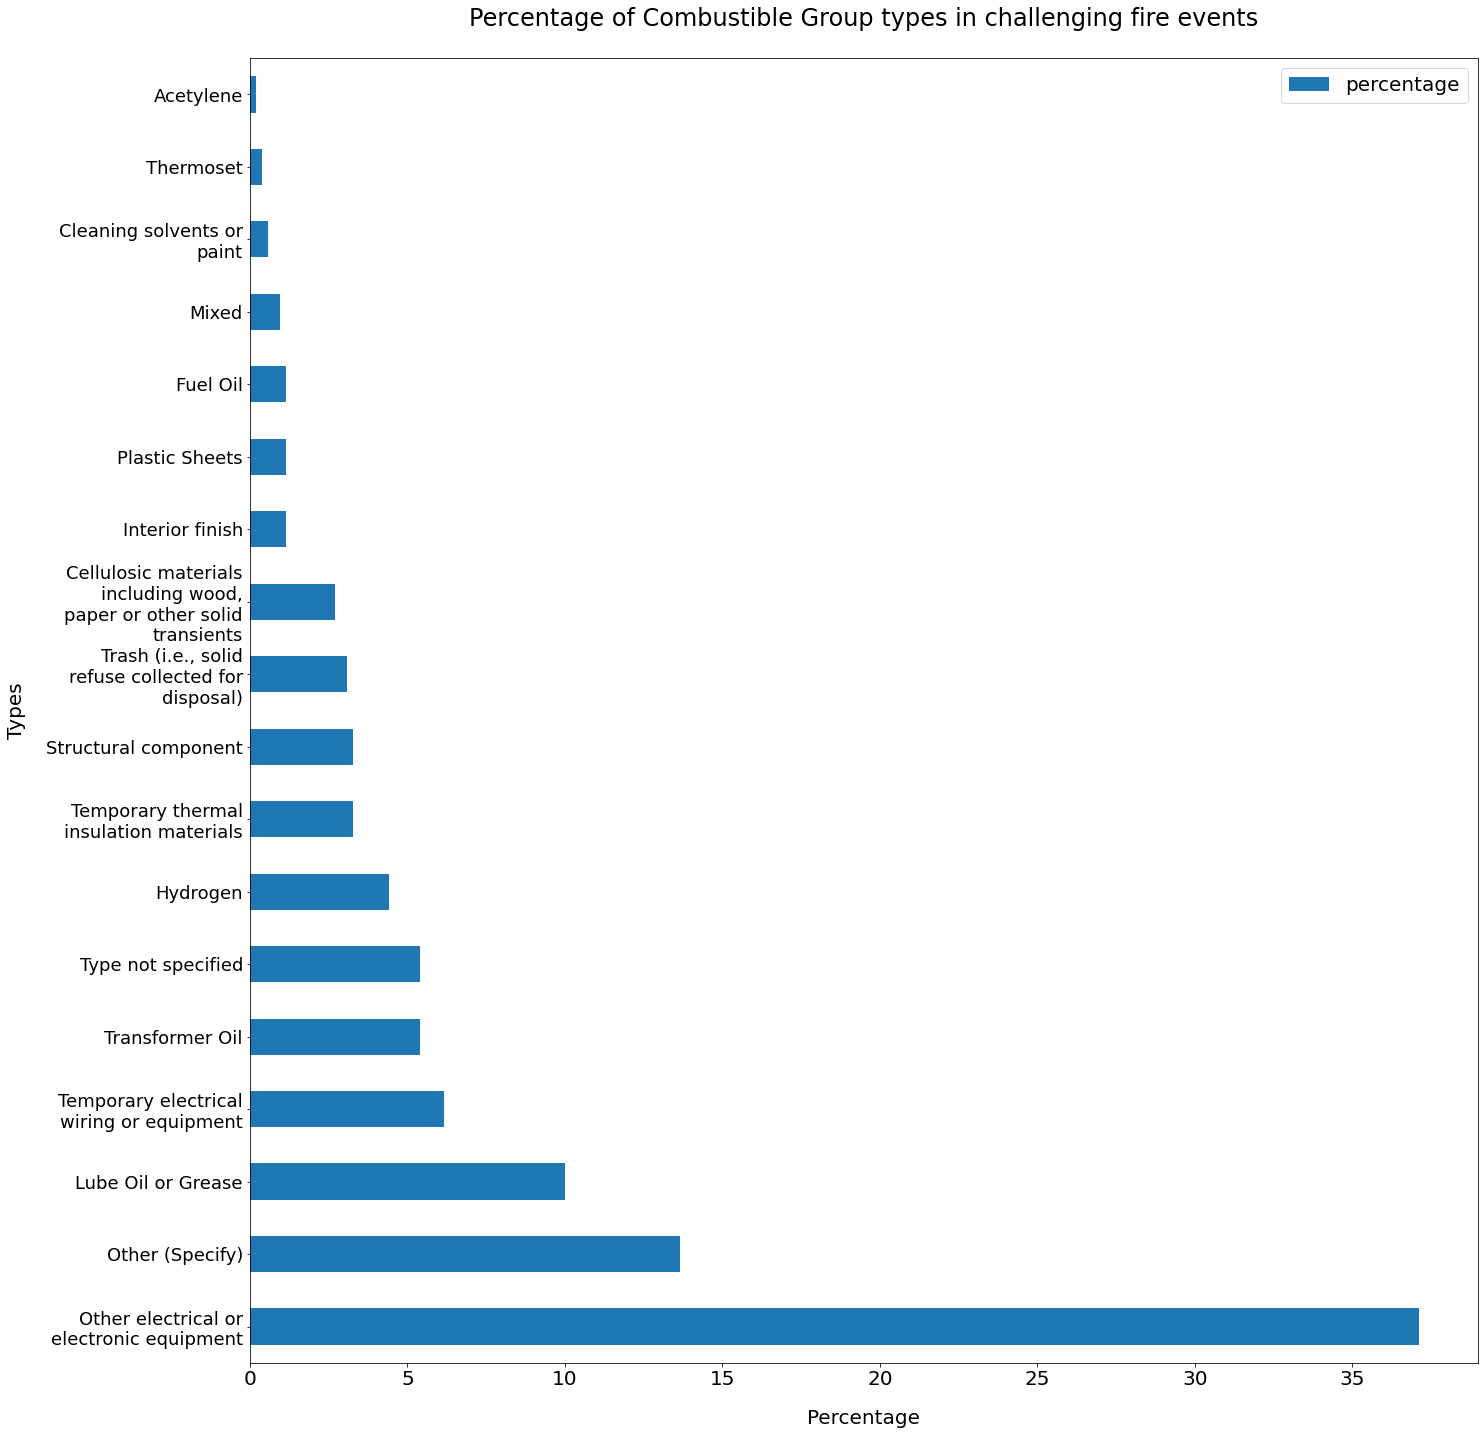

In [8]:
yTickmarks = (counts_barh['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 24])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group types in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Fire Types - Cahellenging - 1990-2014')
plt.show()

In [9]:
# counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 20])

In [10]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Type'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barh['counts'].sum()) * 100
ot_chal

Combustible Group  counts  percentage
0               Gas       3    0.576923
1           In_Situ      41    7.884615
2        Insulation       0    0.000000
3            Liquid       7    1.346154
4         Transient      17    3.269231
5  Transient_Liquid       1    0.192308
6           Unknown       1    0.192308

In [11]:
print(df_em_challenging['Combustible Group'].value_counts())
print(df_em_challenging['Type'].value_counts())
print(df_em_challenging['Form'].value_counts())

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64
Other electrical or electronic equipment                                193
Other (Specify)                                                          71
Lube Oil or Grease                                                       52
Temporary electrical wiring or equipment                                 32
Transformer Oil                                                          28
Type not specified                                                       28
Hydrogen                                                                 23
Temporary thermal insulation materials                                   17
Structural component                                                     17
Trash (i.e., solid refuse collected for disposal)                        16
Cellulosic materials including woo

In [12]:
counts_barf = df_em_challenging['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

unique_values  counts  percentage
0                     Leak - Oil soaked Insulation      31   20.129870
1                                 Unconfined spill      31   20.129870
2                                  Other (Specify)      17   11.038961
3                                     Single Cable      14    9.090909
4                       Contained within component      11    7.142857
5                    Jet from a pressurized source      10    6.493506
6                       Contained within reservoir       6    3.896104
7                               Type not specified       6    3.896104
8            Multiple Cables Not In Tray or Bundle       5    3.246753
9                                          Unknown       5    3.246753
10                      Pressurized in a container       5    3.246753
11  Spill confined by curbs or other physical feat       4    2.597403
12                               Single Cable Tray       3    1.948052
13            Ambient pressure, within a component       3    1.948052
14          Ambient pressure, within a compartment       2    1.298701
15                                Multiple Bundles       1    0.649351

In [13]:
counts_barf = liq_et['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

unique_values  counts  percentage
0                                Unconfined spill      31   36.904762
1                    Leak - Oil soaked Insulation      30   35.714286
2                      Contained within component      10   11.904762
3                                 Other (Specify)       5    5.952381
4                      Contained within reservoir       4    4.761905
5  Spill confined by curbs or other physical feat       4    4.761905

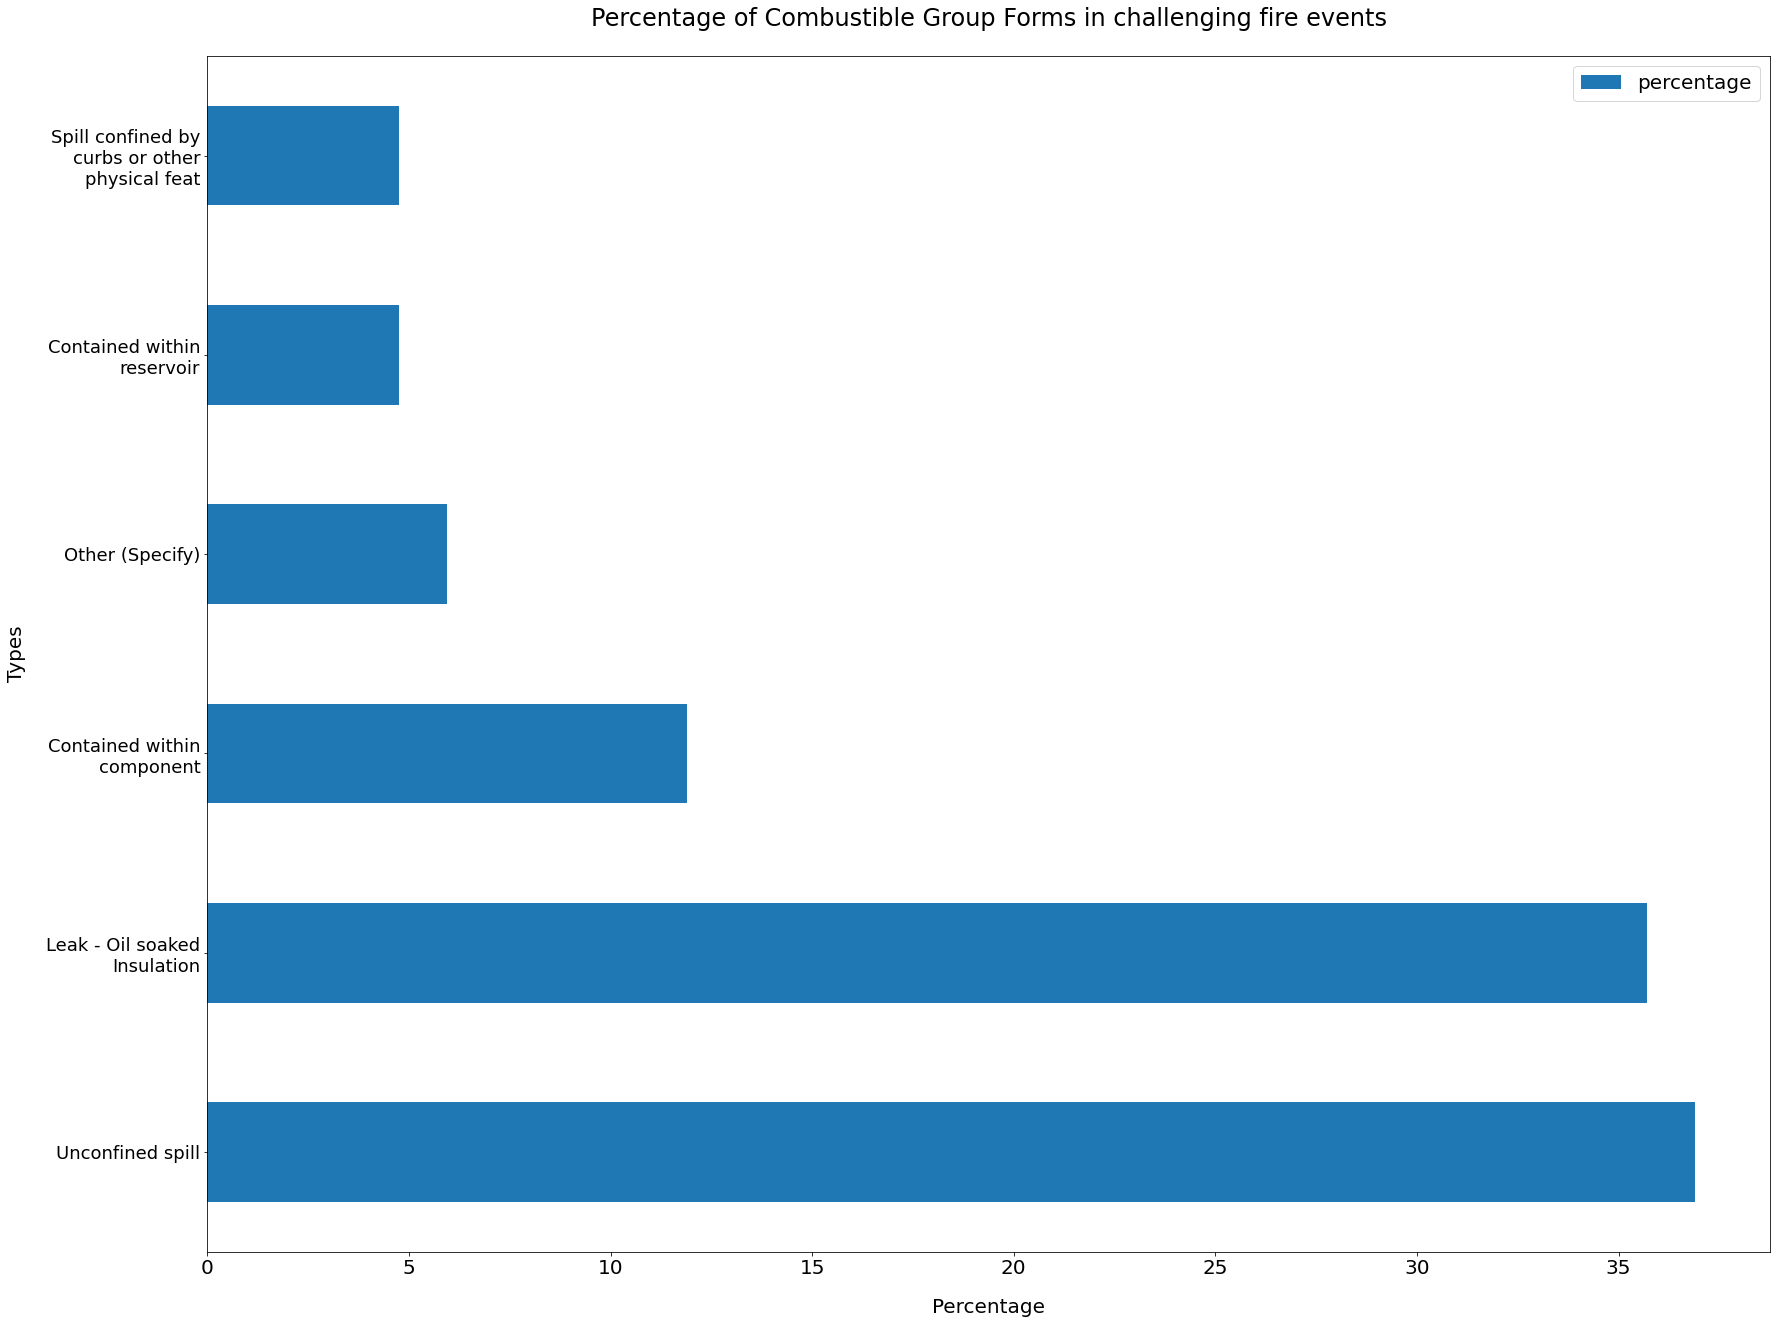

In [14]:
yTickmarks = (counts_barf['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barf.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [28, 22])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group Forms in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Combustible Group Form - Cahellenging - 1990-2014')
plt.show()

In [15]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Form'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barf['counts'].sum()) * 100
ot_chal

Combustible Group  counts  percentage
0               Gas       5    5.952381
1           In_Situ       0    0.000000
2        Insulation       6    7.142857
3            Liquid       5    5.952381
4         Transient       0    0.000000
5  Transient_Liquid       0    0.000000
6           Unknown       1    1.190476

# Plots

In [16]:
def correlation_plot(group1, group2, siz_x, siz_y):
    df_em_gpft = EPRI_up[[group1, group2]].reset_index(drop = True)
    df_em_gpft = pd.DataFrame(df_em_gpft)
    counts = df_em_gpft.groupby([group1, group2])[group2].count()

    x_list = counts.index.get_level_values(0).tolist()
    y_list = counts.index.get_level_values(1).tolist()
    s      = [6*n for n in counts.values]
    s_c    = [n for n in counts.values]


    xTickmarks = sorted(EPRI_up[group2].dropna().unique().tolist())
    yTickmarks = sorted(EPRI_up[group1].dropna().unique().tolist())

    x = [yTickmarks.index(i) for i in x_list]
    y = [xTickmarks.index(i) for i in y_list]
    
    xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
    ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(siz_x, siz_y), dpi = 100) # for landscape
    axes1 = fig.add_subplot(111)
    title = '%s - %s' %(group1, group2)
    save  = '%s - %s.png' %(group1, group2)

    plt.scatter(x, y, s = s, c = s_c)
    cb = plt.colorbar()
    cb.set_label('Number of Fire Events', fontsize=12)
    
    axes1.tick_params(axis='both', which='major', pad=10)
    axes1.set_xlim((-1, len(yTickmarks)))
    axes1.set_ylim((-1, len(xTickmarks)))
    axes1.set_xticks(xrange(len(yTickmarks)))
    axes1.set_yticks(xrange(len(xTickmarks)))
    axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 12)
    axes1.set_yticklabels(xlabels, fontsize = 12)
    axes1.set_ylabel(group2, fontsize = 14, labelpad = 20)
    axes1.set_xlabel(group1, fontsize = 14, labelpad = 20)
    axes1.legend(prop={'size':5}, ncol=4)
    axes1.xaxis.grid(True)
    axes1.set_title(title, fontsize = 16, x=0.5, y = 1.05)

    plt.show()
    fig.savefig(sys_updated + save, bbox_inches='tight')
    #fig.savefig(save, bbox_inches='tight')

**Fire Events Years**

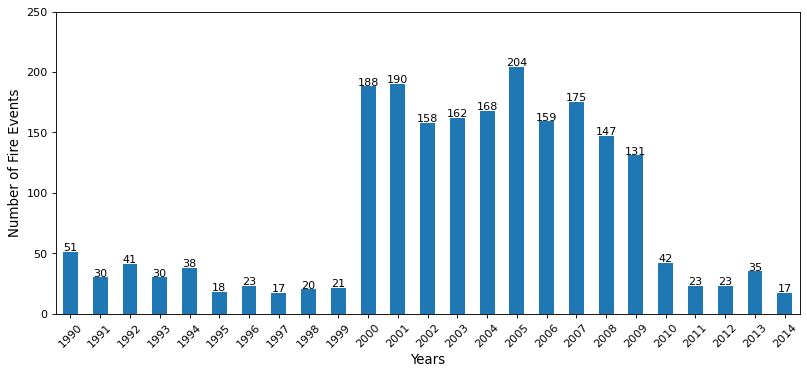

In [17]:
EPRI_up['Event Date_FES'] = pd.to_datetime(EPRI_up['Event Date_FES'])              # Convert to date-time format
EPRI_up['year'] = EPRI_up['Event Date_FES'].dt.year                                # Extract converted years 
df_year = EPRI_up['year'].sort_values(ascending = True)                            # Sort Years
year_labels = sorted(EPRI_up['year'].dropna().unique())
year_labels = np.array(year_labels, dtype=np.float32)

fig_year = plt.figure(figsize=(12, 5), dpi=80)
ax_year  = fig_year.add_subplot(111)
counts_insc = df_year.value_counts(sort= False, ascending = True).sort_index(ascending = True)
(df_year.value_counts(sort= False, ascending = True).sort_index(ascending = True)).plot(kind ='bar', rot= 45)
#ax_year.set_title('Fire Events at NPPs for years between 1990-2014', fontsize=16, y=1.05)
ax_year.set_xlabel('Years', fontsize = 12)
ax_year.set_ylabel('Number of Fire Events', fontsize = 12)
ax_year.set_ylim(0, 250)
ax_year.set_xticklabels(year_labels.astype(int))
for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
plt.savefig(sys_up_dplo + 'Fire Events 1990-2014_pp')
plt.show()

# Reclassification Percentage

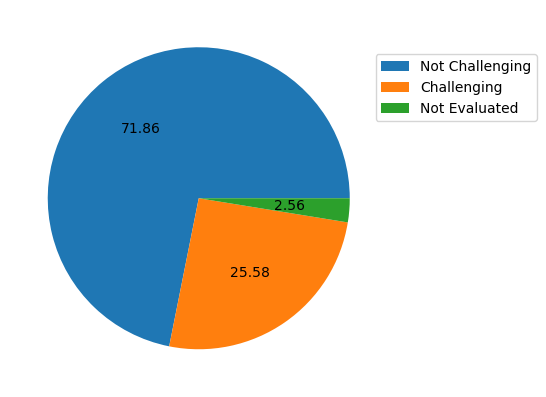

In [18]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Disposition_new'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', labels=None)
#plt.legend(loc='upper left')
#fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(bbox_to_anchor=(0.95, 0.90), labels=EPRI_up['Disposition_new'].value_counts().index)
plt.show()
fig_bd.savefig(sys_up_dplo + "New_Disposition_pp.png", bbox_inches='tight')

**Plant Area for Fire Events at NPP for 1990-2014**

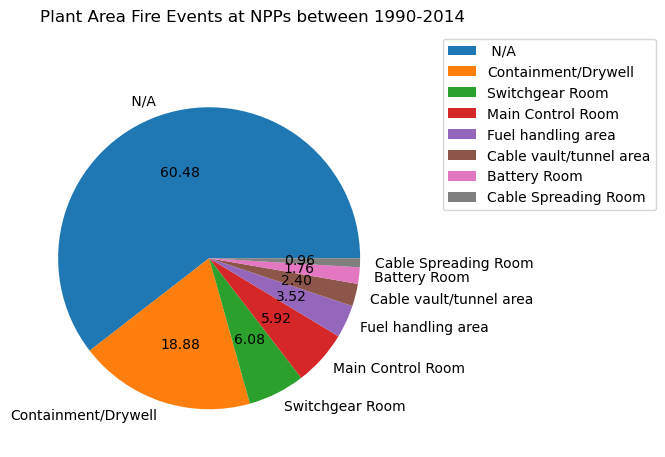

In [19]:
fig_ptar = plt.figure(figsize=(5,5), dpi=100)
ax_ptar = plt.subplot(111)
EPRI_up['Plant Area'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ptar.suptitle('Plant Area Fire Events at NPPs between 1990-2014', fontsize=12, x = 0.6, y = 1)
ax_ptar.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()
fig_ptar.savefig(sys_up_dplo + "Plant Area.png", bbox_inches='tight')

**NPP Building for Fire Events between (1990-2014)**

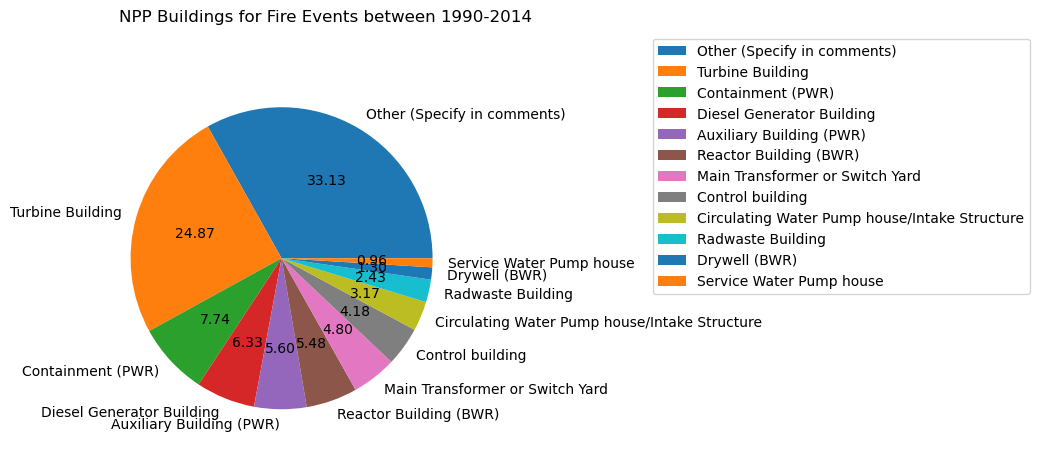

In [20]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(bbox_to_anchor=(2.5, 1.1))
plt.show()
fig_bd.savefig(sys_up_dplo + "Building.png", bbox_inches='tight')

In [21]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellowgreen', 'cyan', 'beige', 'firebrick']

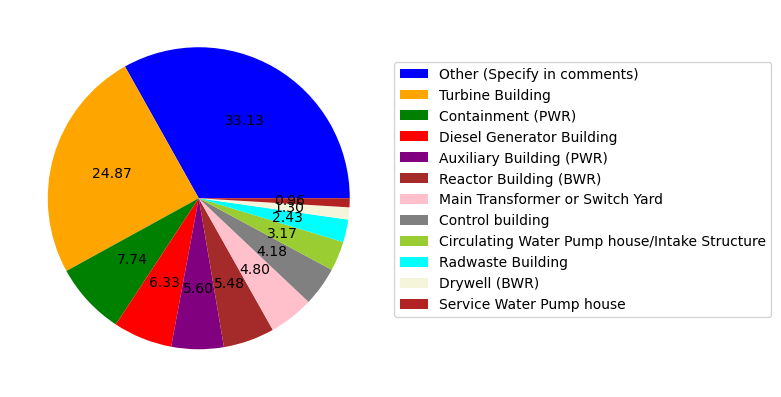

In [22]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', labels=None, colors=colors)
#plt.legend(loc='upper left')
#fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(bbox_to_anchor=(1.0, 0.88), labels=EPRI_up['Building'].value_counts().index)
plt.show()
fig_bd.savefig(sys_up_dplo + "Building_pp.png", bbox_inches='tight')

**Component Group**

In [23]:
colors_cg = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 
             'yellowgreen', 'cyan', 'beige', 'yellow',
            'violet', 'lime', 'tomato', 'crimson', 'olive']
explode_cg = [0, 0, 0, 0, 0,
             0, 0, 0, 0.85, 0.85,
             0.9, 0.95, 1, 1.25, 1.5,
             1.75, 2]

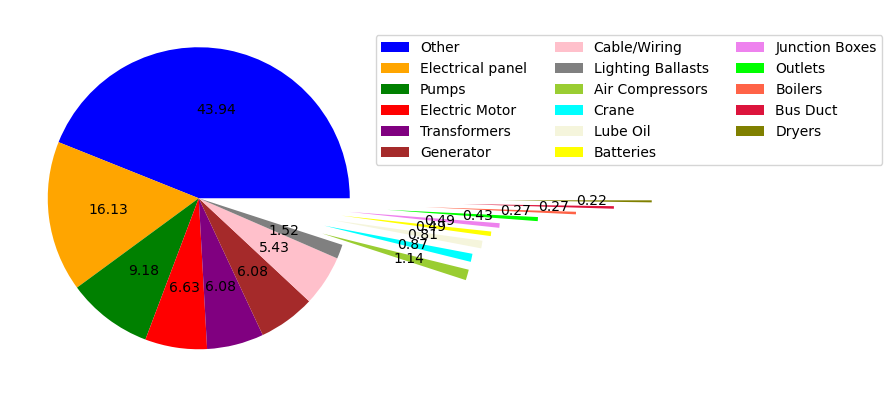

In [24]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Component Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', 
                                               labels=None, colors = colors_cg, explode = explode_cg)
#plt.legend(loc='upper left')
#fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(prop={'size':10}, ncol=3, bbox_to_anchor=(0.95, 0.95), labels=EPRI_up['Component Group'].value_counts().index)
plt.show()
fig_bd.savefig(sys_up_dplo + "Component Group_pp.png", bbox_inches='tight')

**Component Group and Fire Severity Level**

**Fire Type for Fire Events between (1990-2014)**

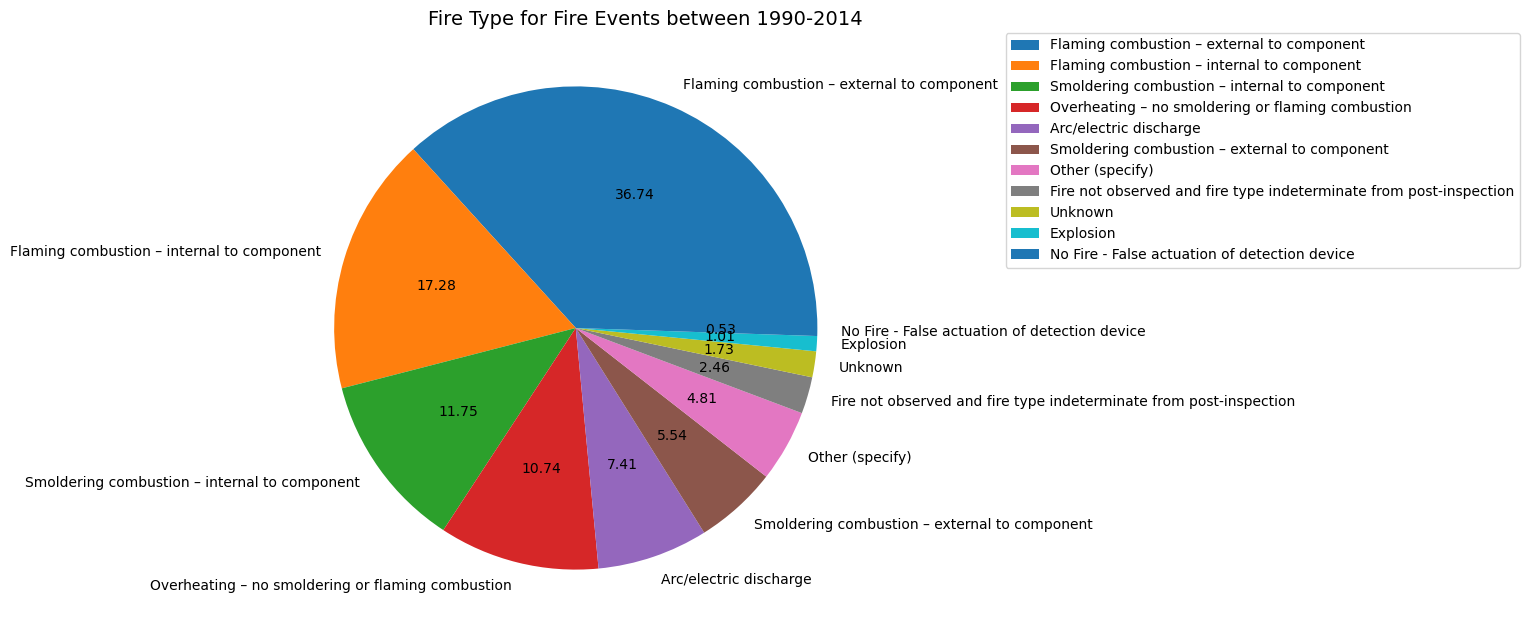

In [25]:
fig_ct = plt.figure(figsize=(8,8), dpi=100)
ax_ct = plt.subplot(111)
EPRI_up['Fire Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ct.suptitle('Fire Type for Fire Events between 1990-2014', fontsize=14, x = 0.6, y =0.90)
ax_ct.legend(bbox_to_anchor=(1.2, 1.0))
plt.show()
fig_ct.savefig(sys_up_dplo + "Fire Type.png", bbox_inches='tight')

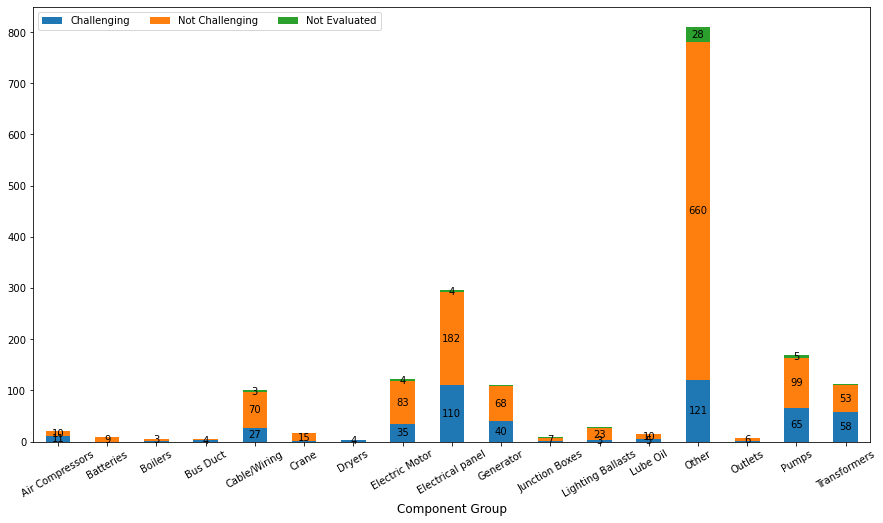

In [26]:
dpbd       = EPRI_up.groupby(['Component Group'])['Disposition_new'].value_counts()
ax_dpbd    = dpbd.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Component Group'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpbd.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpbd.set_xlabel('Component Group', fontsize = 12)
ax_dpbd.legend(prop={'size':10}, ncol=4)
#ax_dpbd.set_title('Component Group and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
for p in ax_dpbd.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 2:  # anything that have a height of 0 will not be annotated
            ax_dpbd.text(x + 0.5 * w, y + 0.5 * h, '%0.f'%h, va='center', ha='center')
plt.savefig(sys_up_dplo + 'Component Group-Fire Severity_pp')
plt.show()

**Fire Cause for Fire Events between (1990-2014)**

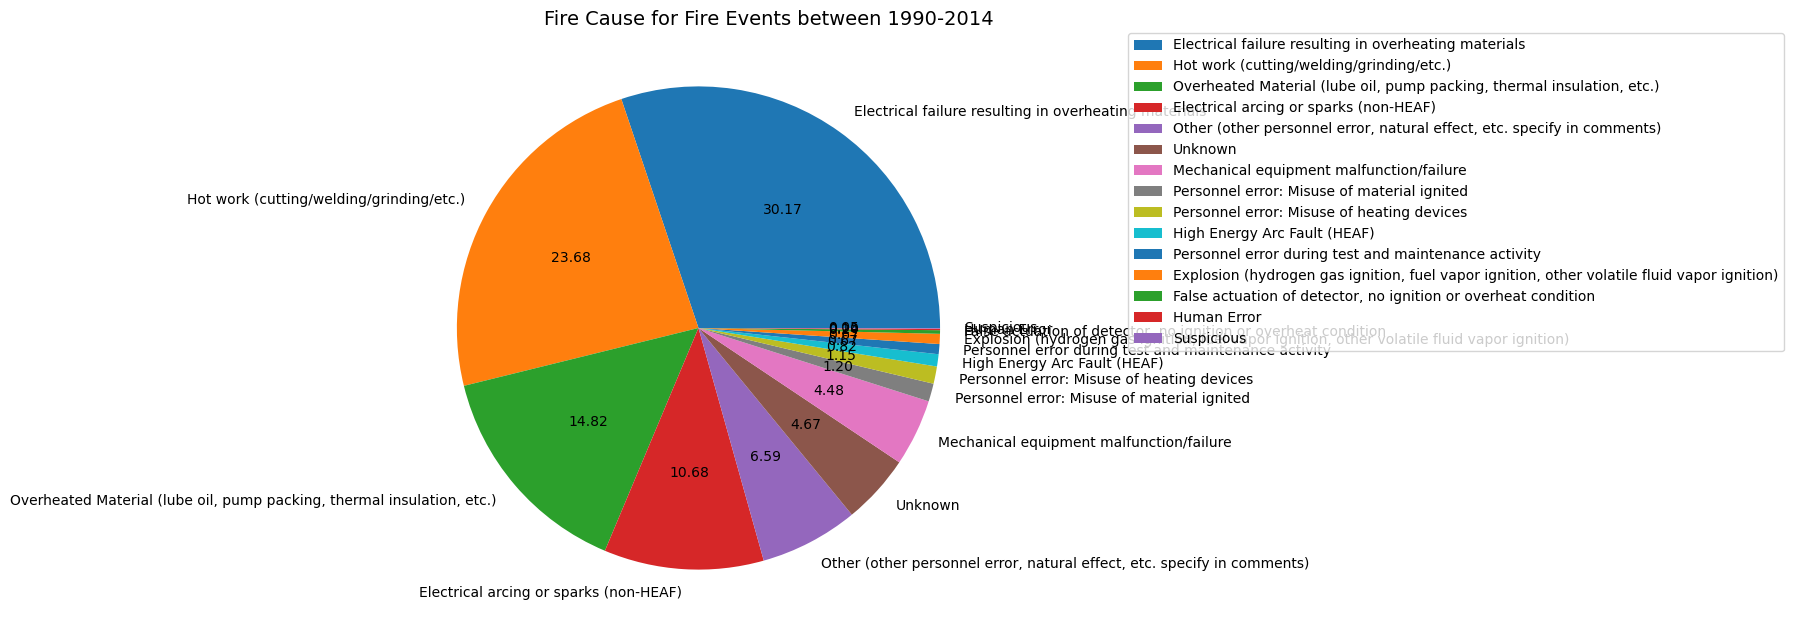

In [27]:
fig_ct = plt.figure(figsize=(8,8), dpi=100)
ax_ct = plt.subplot(111)
EPRI_up['Fire Cause'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ct.suptitle('Fire Cause for Fire Events between 1990-2014', fontsize=14, x = 0.6, y =0.90)
ax_ct.legend(bbox_to_anchor=(1.2, 1.0))
plt.show()
fig_ct.savefig(sys_up_dplo + "Fire Cause.png", bbox_inches='tight')

**Reactor Mode Prior and After Fire Event Detection**

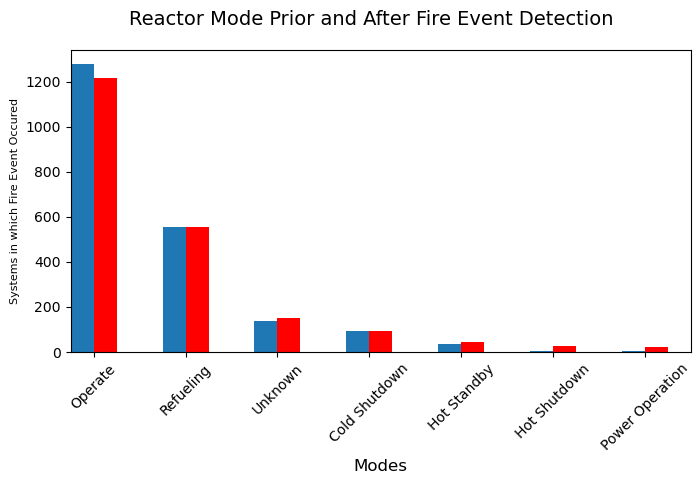

In [28]:
fig_mpa = plt.figure(figsize=(8, 4), dpi=100)
fig_mpa.suptitle('Reactor Mode Prior and After Fire Event Detection', fontsize=14, x = 0.5, y = 0.98)
EPRI_up['Mode Prior'].value_counts(ascending=False).plot(kind='bar', position =1, width = 0.25, rot = 45)
EPRI_up['Mode After'].value_counts(ascending=False).plot(kind='bar', position =0, width = 0.25, color = 'red', rot =45)
plt.ylabel('Systems in which Fire Event Occured', fontsize = 8)
plt.xlabel('Modes', fontsize = 12)
plt.show()
fig_mpa.savefig(sys_up_dplo + "Reactor Mode.png", bbox_inches='tight')

**Primary Combustible Groups for fire events from events between 1990-2014**

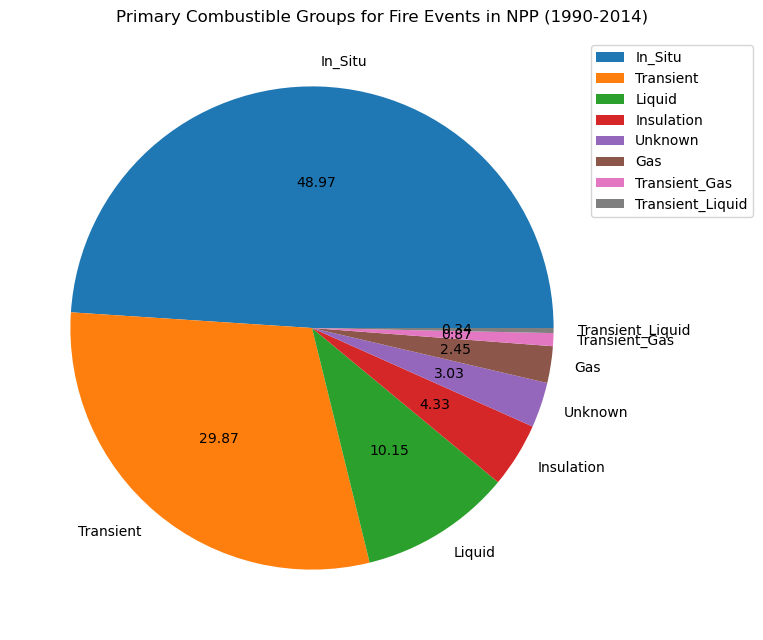

In [29]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
EPRI_up['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups.png", bbox_inches='tight')

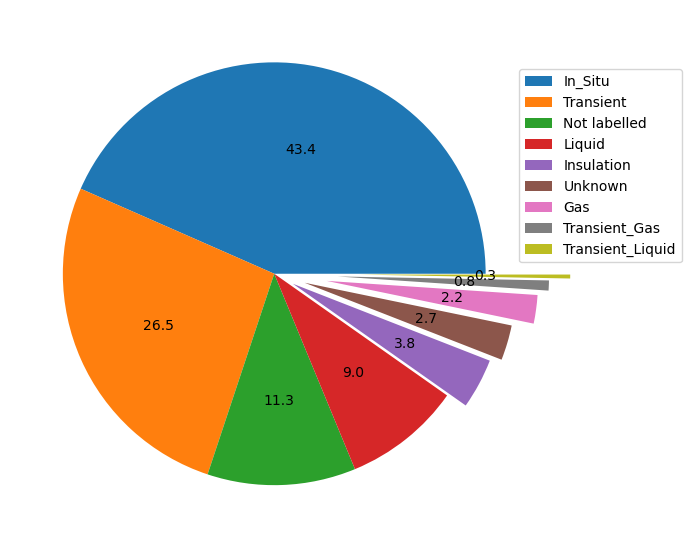

In [30]:
explode_pcg = [0, 0, 0, 0, 0.1, 0.15, 0.25, 0.3, 0.4]
fig_grp = plt.figure(figsize=(7, 7), dpi=100)
ax_grp  = plt.subplot(111)
cg = EPRI_up
cg['Combustible Group'] = cg['Combustible Group'].replace([np.nan],['Not labelled'])
cg['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.1f', legend = True, 
                                                 fontsize=10, label='', labels=None, explode=explode_pcg)
#plt.legend(loc='upper left')
#fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.90), labels=cg['Combustible Group'].value_counts().index)
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups_pp.png", bbox_inches='tight')

**Primary Combustible Groups for challenging fire events from events between 1990-2014**

In [31]:
labels_chal = df_em_challenging['Combustible Group'].unique().tolist()
print(labels_chal)

['Gas', 'Transient', 'In_Situ', 'Liquid', 'Insulation', 'Unknown', 'Transient_Liquid', nan]


In [32]:
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0)
df_em_challenging['Combustible Group'].value_counts()

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


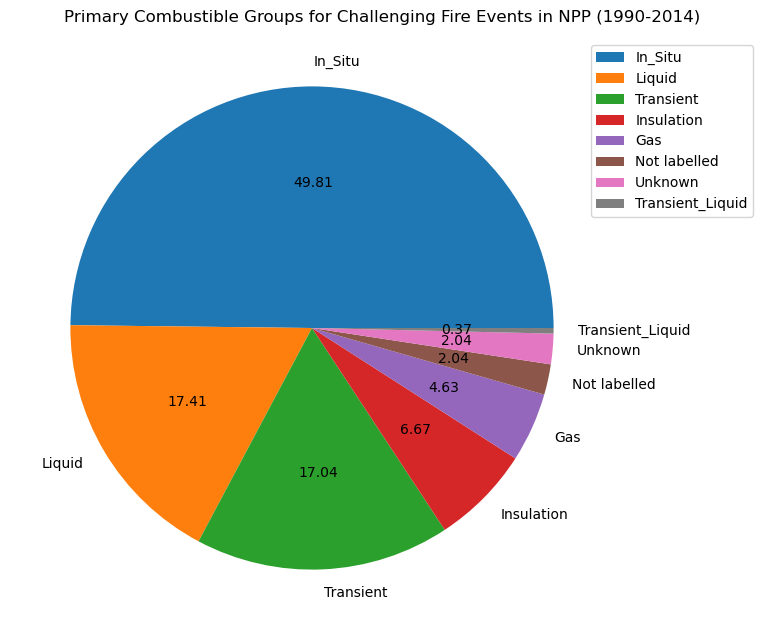

In [33]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
explode = (0, 0, 0, 0, 0.1, 0, 0, 0)
CHAL = df_em_challenging
CHAL['Combustible Group'] = CHAL['Combustible Group'].replace([np.nan],['Not labelled'])
CHAL['Combustible Group'].value_counts(dropna=False).plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Challenging Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups Challenging.png", bbox_inches='tight')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


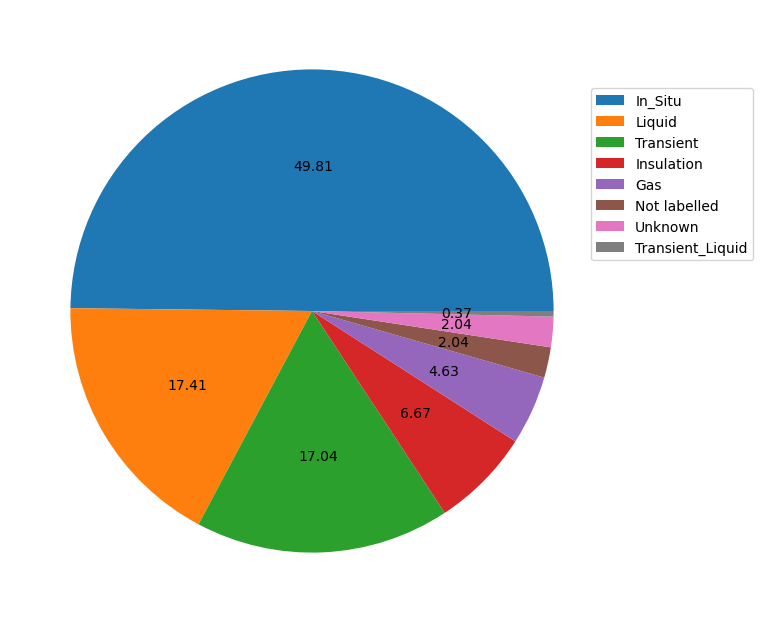

In [34]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
explode = (0, 0, 0, 0, 0.1, 0, 0, 0)
CHAL = df_em_challenging
CHAL['Combustible Group'] = CHAL['Combustible Group'].replace([np.nan],['Not labelled'])
CHAL['Combustible Group'].value_counts(dropna=False).plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', labels=None)
#plt.legend(loc='upper left')
#fig_grp.suptitle('Primary Combustible Groups for Challenging Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.88), labels = CHAL['Combustible Group'].value_counts(dropna=False).index)
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups Challenging_pp.png", bbox_inches='tight')

**Detection Performance and Fire Level Severity**

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


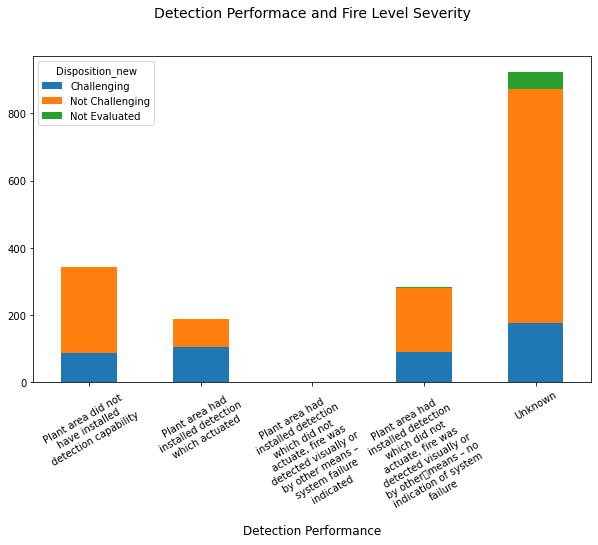

In [35]:
dpfs       = EPRI_up.groupby(['Detection Performance'])['Disposition_new'].value_counts()
ax_dpfs    = dpfs.unstack().plot(kind='bar', stacked = True, figsize = (10,6))
xTickmarks = sorted(EPRI_up['Detection Performance'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfs.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfs.set_xlabel('Detection Performance', fontsize = 12)
#ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpfs.set_title('Detection Performace and Fire Level Severity', fontsize = 14, x=0.5, y = 1.1)
plt.savefig(sys_up_dplo + 'Detection Performance-Fire Severity')
plt.show()

**Suppression Time and its relation with Disposition**

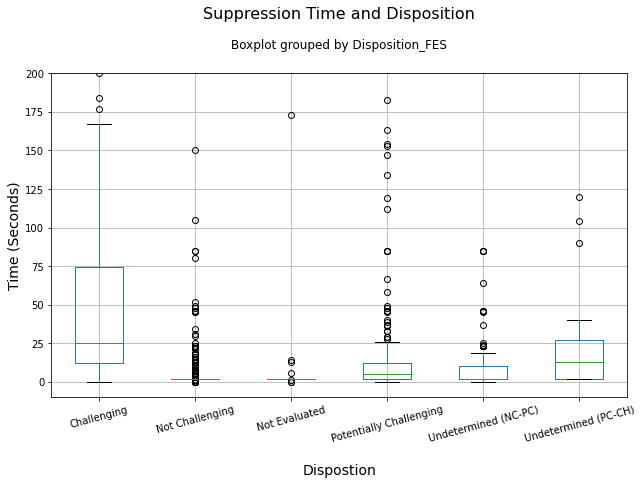

In [36]:
fig, ax_stdp = plt.subplots(figsize=(10, 6))
EPRI_up.boxplot(column=['Suppression Time'], by='Disposition_FES', ax=ax_stdp)
plt.ylim(-10, 200)
plt.ylabel('Time (Seconds)', fontsize = 14)
plt.xticks(rotation = 15)
plt.xlabel('Dispostion', fontsize = 14, labelpad=20)
plt.title('Suppression Time and Disposition', x = 0.5, y = 1.15, fontsize = 16)
plt.savefig(sys_up_dplo + 'Suppression Time-Fire Severity')
plt.show()

**Fire Severity Level in Buildings**

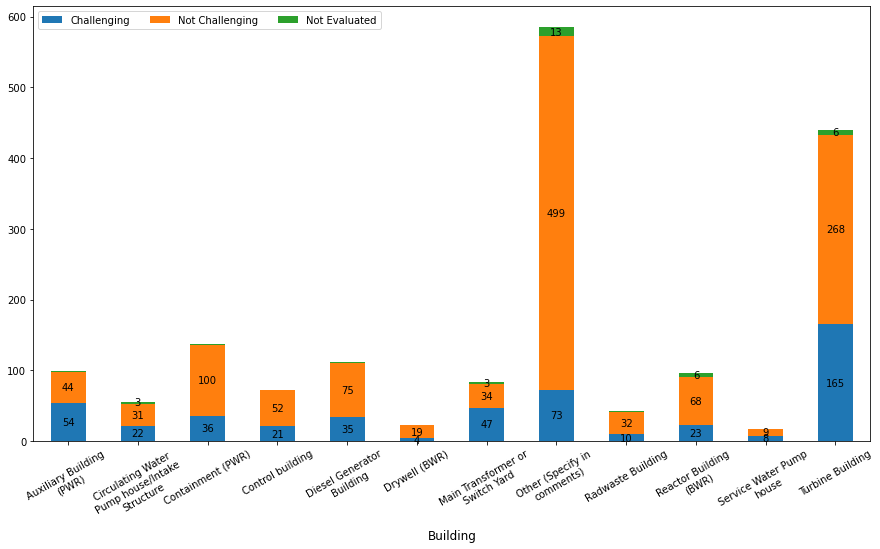

In [37]:
dpbd       = EPRI_up.groupby(['Building'])['Disposition_new'].value_counts()
ax_dpbd    = dpbd.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Building'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpbd.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpbd.set_xlabel('Building', fontsize = 12)
ax_dpbd.legend(prop={'size':10}, ncol=4)
#ax_dpbd.set_title('Building and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
for p in ax_dpbd.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 2:  # anything that have a height of 0 will not be annotated
            ax_dpbd.text(x + 0.5 * w, y + 0.5 * h, '%0.f'%h, va='center', ha='center')
plt.savefig(sys_up_dplo + 'Buildings-Fire Severity_pp')
plt.show()

**Combustible Group and Fire Severity**

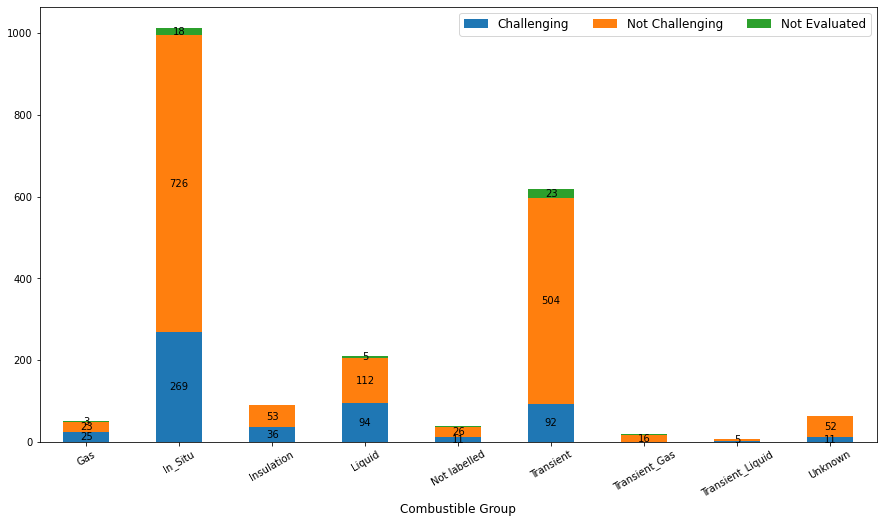

In [38]:
dpcg       = EPRI_up.groupby(['Combustible Group'])['Disposition_new'].value_counts()
ax_dpcg    = dpcg.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Combustible Group'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpcg.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpcg.set_xlabel('Combustible Group', fontsize = 12)
ax_dpcg.legend(prop={'size':12}, ncol=4)
#ax_dpcg.set_title('Combustible Group and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
for p in ax_dpcg.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 2:  # anything that have a height of 0 will not be annotated
            ax_dpcg.text(x + 0.5 * w, y + 0.5 * h, '%0.f'%h, va='center', ha='center')
plt.savefig(sys_up_dplo + 'Combustible Groups-Fire Severity_pp')
plt.show()

**Fire Type and Disposition**

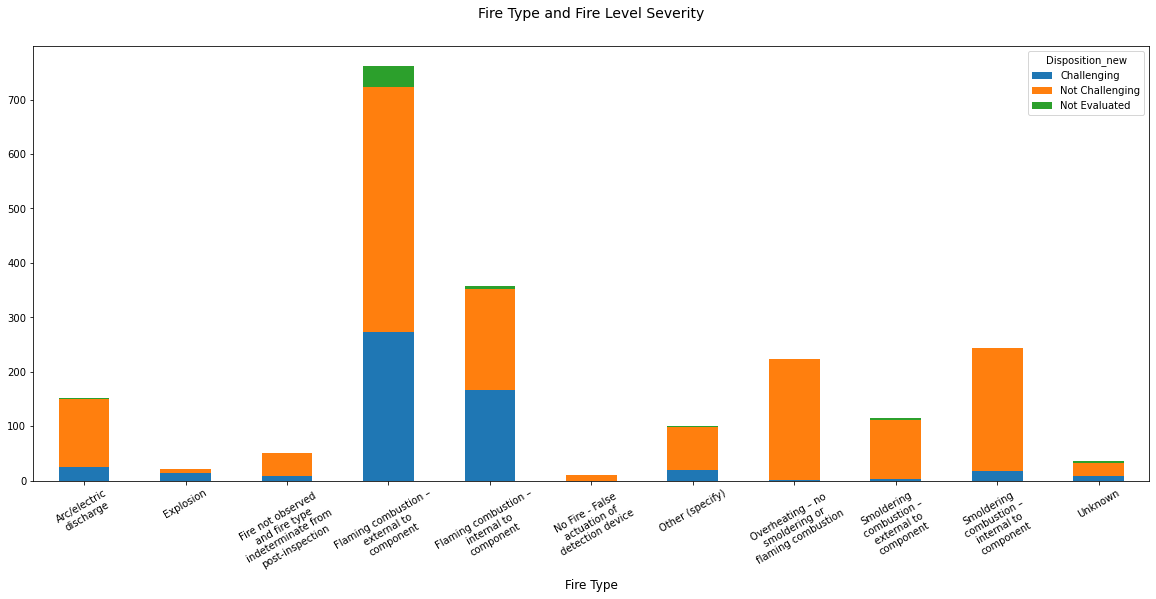

In [39]:
dpft       = EPRI_up.groupby(['Fire Type'])['Disposition_new'].value_counts()
ax_dpft    = dpft.unstack().plot(kind='bar', stacked = True, figsize = (20,8))
xTickmarks = sorted(EPRI_up['Fire Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpft.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpft.set_xlabel('Fire Type', fontsize = 12)
ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpft.set_title('Fire Type and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Type-Fire Severity', bbox_inches='tight')
plt.show()

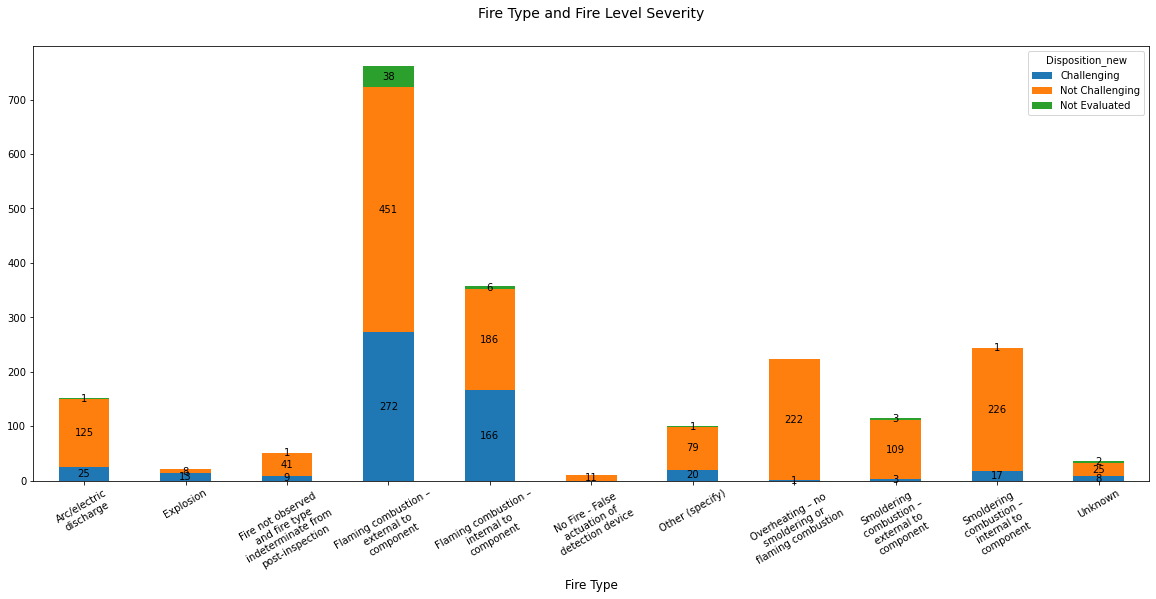

In [40]:
dpft       = EPRI_up.groupby(['Fire Type'])['Disposition_new'].value_counts()
ax_dpft    = dpft.unstack().plot(kind='bar', stacked = True, figsize = (20,8))
xTickmarks = sorted(EPRI_up['Fire Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpft.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpft.set_xlabel('Fire Type', fontsize = 12)
ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpft.set_title('Fire Type and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
for p in ax_dpft.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 0:  # anything that have a height of 0 will not be annotated
            ax_dpft.text(x + 0.5 * w, y + 0.5 * h, '%0.f'%h, va='center', ha='center')
plt.savefig(sys_up_dplo + 'Fire Type-Fire Severity', bbox_inches='tight')
plt.show()

**Fire Cause and Fire Severity Level**

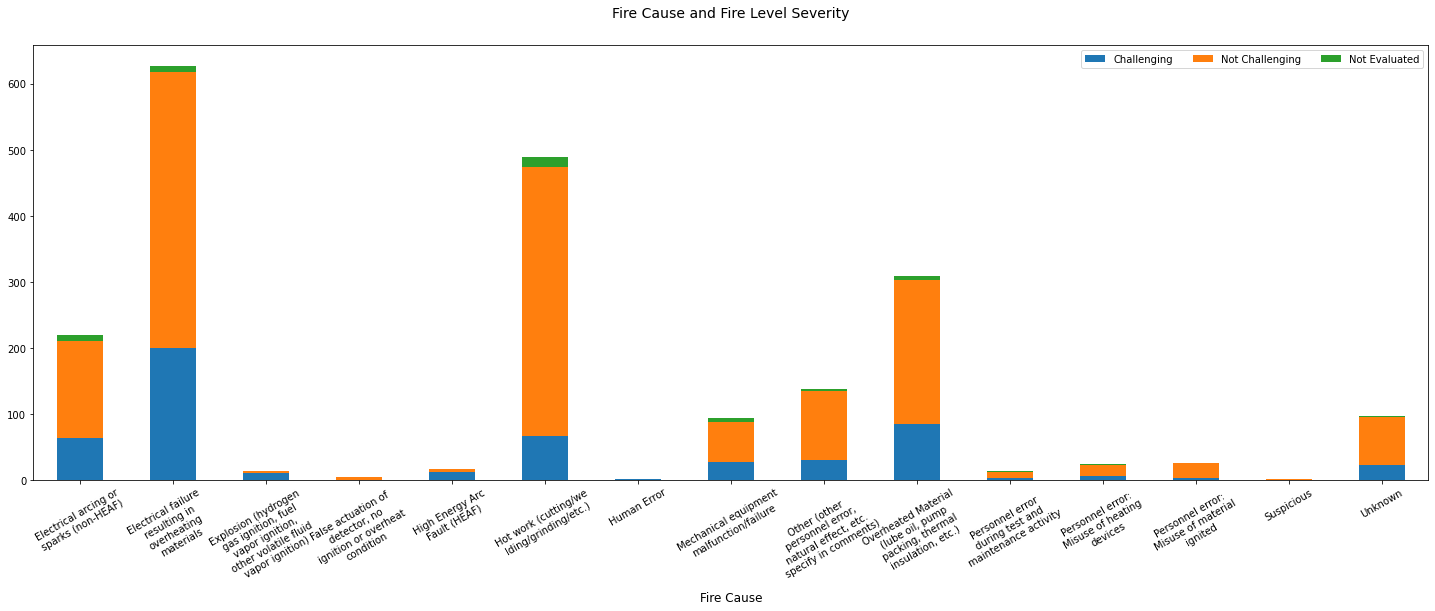

In [41]:
dpfc       = EPRI_up.groupby(['Fire Cause'])['Disposition_new'].value_counts()
ax_dpfc    = dpfc.unstack().plot(kind='bar', stacked = True, figsize = (25,8))
xTickmarks = sorted(EPRI_up['Fire Cause'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfc.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfc.set_xlabel('Fire Cause', fontsize = 12)
ax_dpfc.legend(prop={'size':10}, ncol=4)
ax_dpfc.set_title('Fire Cause and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Cause-Fire Severity')
plt.show()

# Combustible Group

# In-Situ

In [42]:
insitu_et['Type'] = insitu_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_ituchal = insitu_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_ituchal)

insitu_tc = insitu_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_ituchal) * 100).round(1)
insitu_tc

540
269


unique_values  counts  percentage  \
0  Other electrical or electronic equipment     188        34.8   
1                           Other (Specify)      41         7.6   
2                      Structural component      17         3.1   
3    Temporary thermal insulation materials      14         2.6   
4                           Interior finish       6         1.1   
5                        Type not specified       2         0.4   
6                              Not Labelled       1         0.2   

   percentage_itu  
0            69.9  
1            15.2  
2             6.3  
3             5.2  
4             2.2  
5             0.7  
6             0.4

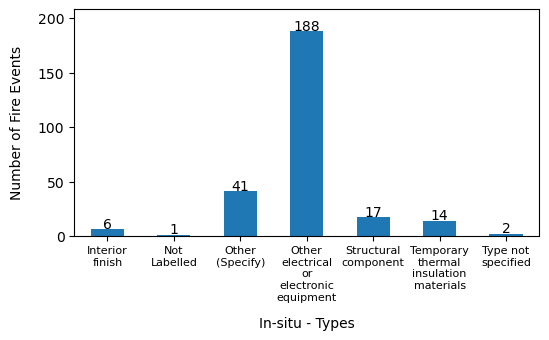

In [43]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_insc  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insc = fig_insc.add_subplot(111)
counts_insc = insitu_et['Type'].value_counts().sort_index(ascending=True)
counts_insc.plot(kind='bar')

axes_insc.set_ylim((0, np.max(counts_insc)+20))
axes_insc.set_xticklabels(xlabels, rotation = 0, fontsize=8)
#axes_insc.set_title('In-situ types in challenging fire events', fontsize = 12, x=0.5, y = 1.1)
axes_insc.set_ylabel('Number of Fire Events', labelpad=10)
axes_insc.set_xlabel('In-situ - Types', labelpad=10)

for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_insc.savefig(sys_up_dplo + "In-Situ Types distribution in Challenging Fire Events_pp.png", bbox_inches='tight')

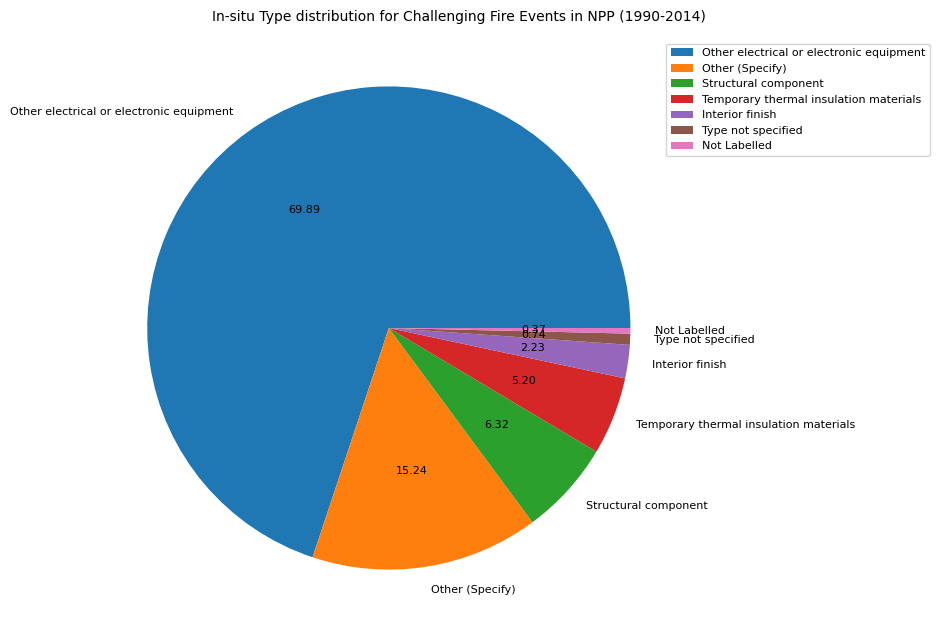

In [44]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
insitu_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=8, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('In-situ Type distribution for Challenging Fire Events in NPP (1990-2014)', fontsize=10, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98), fontsize=8)
plt.show()
fig_grp.savefig(sys_up_dplo + "In-Situ Type Challenging.png", bbox_inches='tight')

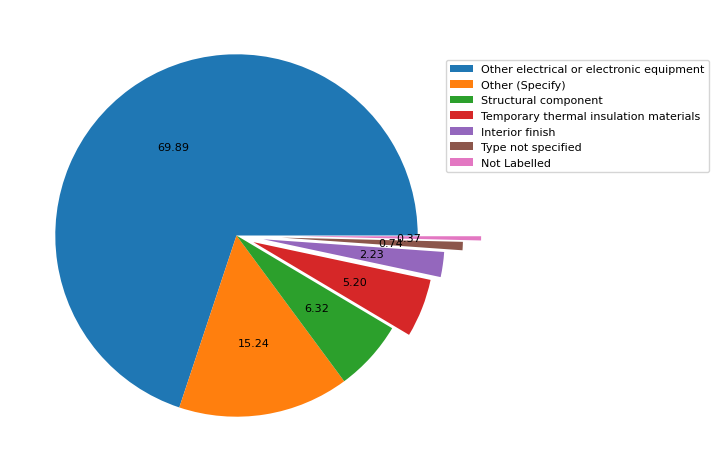

In [45]:
fig_grp = plt.figure(figsize=(6, 6), dpi=100)
ax_grp  = plt.subplot(111)
insitu_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True,
                                      fontsize=8, label='', labels=None, explode=[0,0,0,0.1,0.15,0.25,0.35])
#plt.legend(loc='upper left')
#fig_grp.suptitle('In-situ Type distribution for Challenging Fire Events in NPP (1990-2014)', fontsize=10, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.9), fontsize=8, labels= insitu_et['Type'].value_counts().index)
plt.show()
fig_grp.savefig(sys_up_dplo + "In-Situ Type Challenging_pp.png", bbox_inches='tight')

No handles with labels found to put in legend.


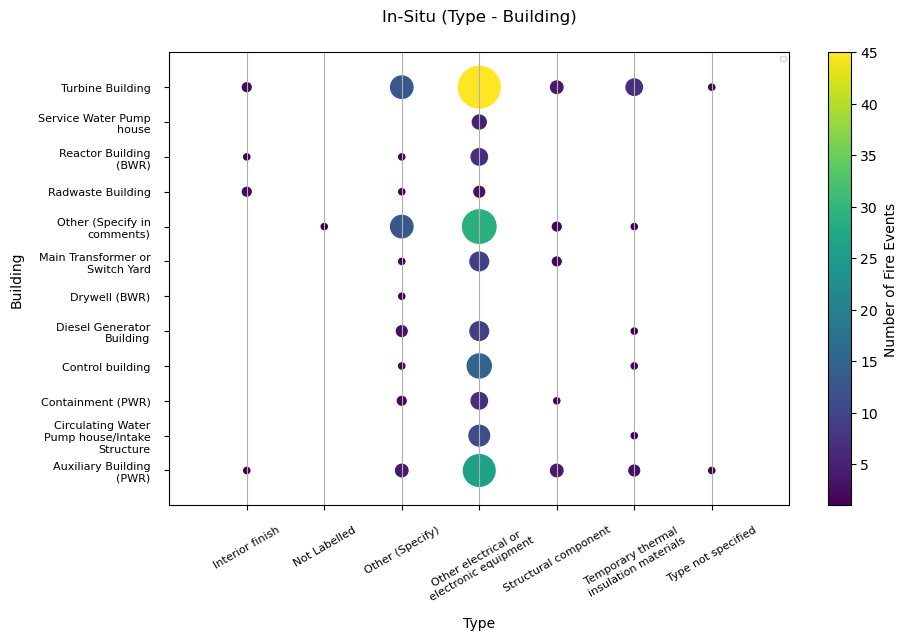

In [46]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [20*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


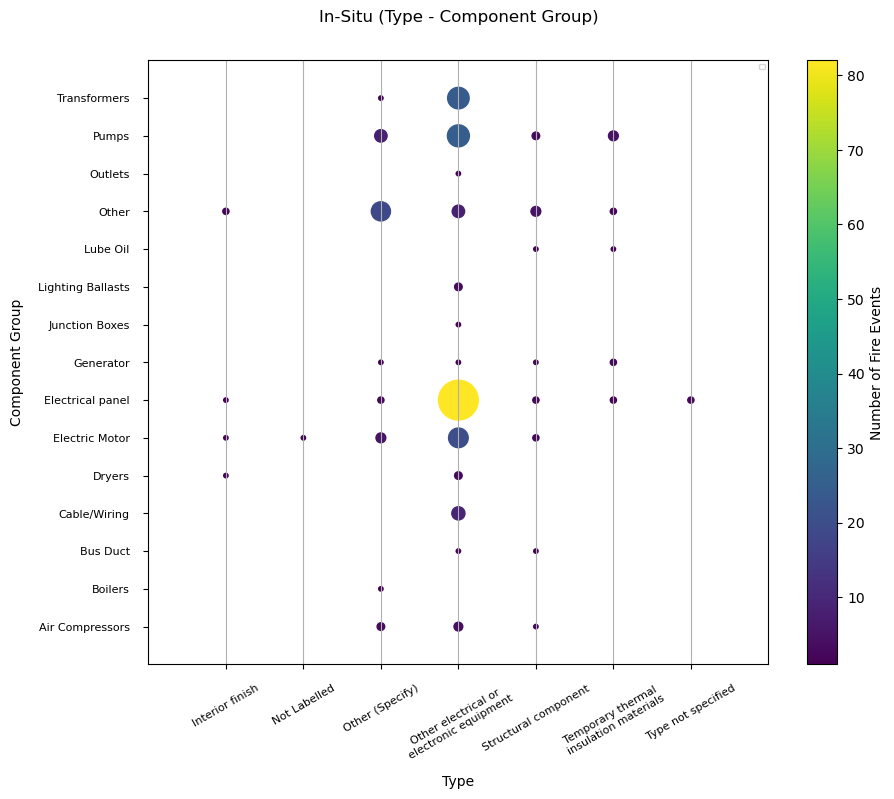

In [47]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [10*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


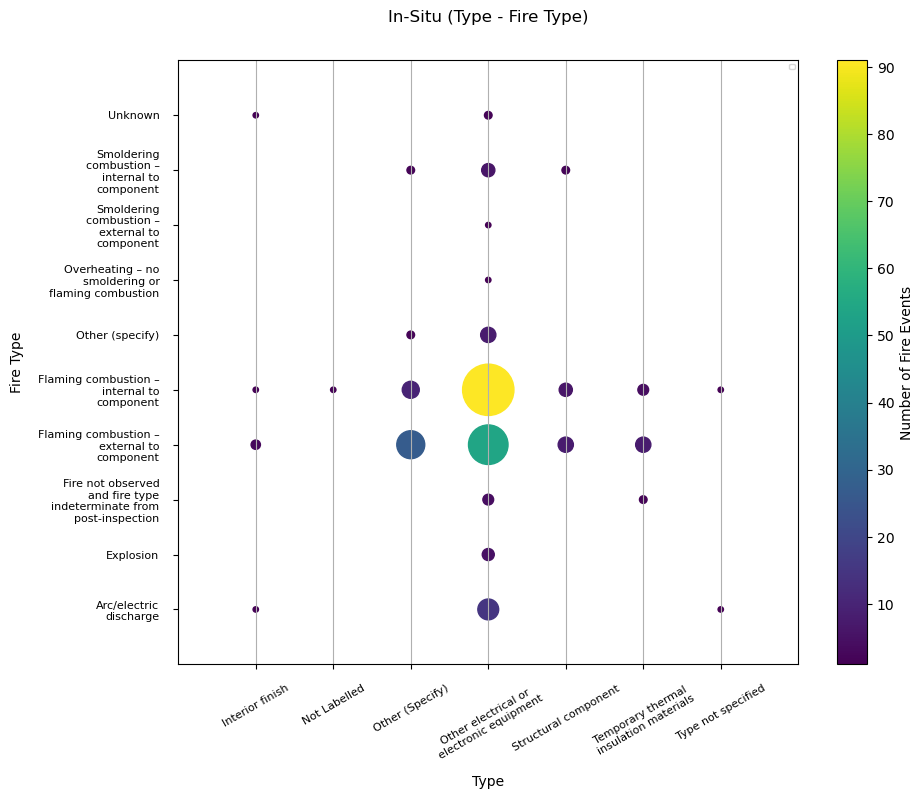

In [48]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [15*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Fire Type)', bbox_inches='tight')

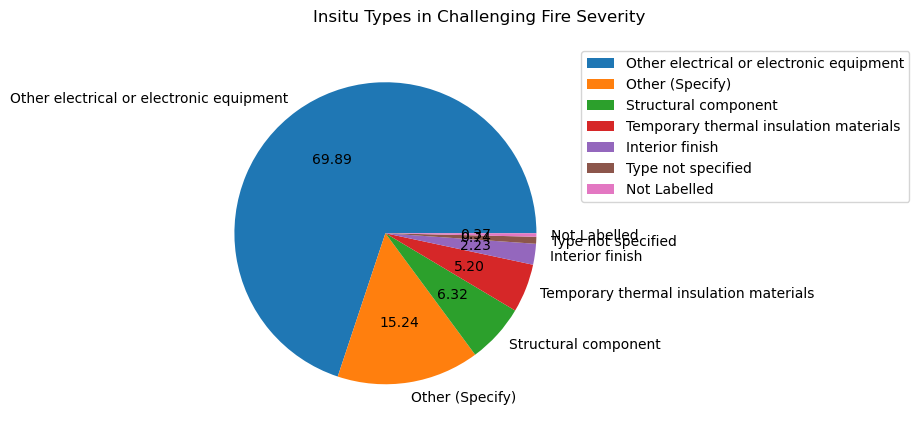

In [49]:
fig_insitu = plt.figure(figsize=(5,5), dpi=100)
ax_insitu = plt.subplot(111)
insitu_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_insitu.suptitle('Insitu Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_insitu.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_insitu.savefig(sys_up_dplo + "Insitu Types pie.png", bbox_inches='tight')

In [50]:
insitu_et['Type'].value_counts(dropna=False)

Other electrical or electronic equipment    188
Other (Specify)                              41
Structural component                         17
Temporary thermal insulation materials       14
Interior finish                               6
Type not specified                            2
Not Labelled                                  1
Name: Type, dtype: int64

# Liquid

In [51]:
liq_et['Type'] = liq_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_liqchal = liq_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_liqchal)

insitu_tc = liq_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_liqchal) * 100).round(1)
insitu_tc

540
94


unique_values  counts  percentage  percentage_itu
0          Lube Oil or Grease      51         9.4            54.3
1             Transformer Oil      28         5.2            29.8
2             Other (Specify)       7         1.3             7.4
3                    Fuel Oil       6         1.1             6.4
4  Cleaning solvents or paint       2         0.4             2.1

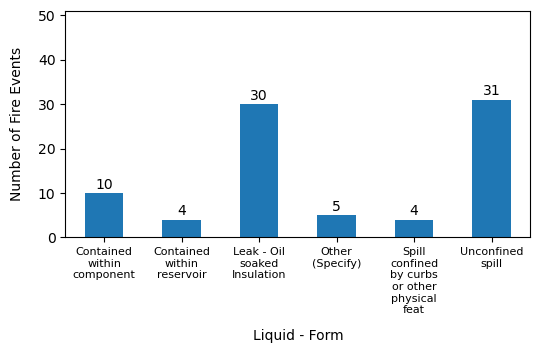

In [52]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_insc  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insc = fig_insc.add_subplot(111)
counts_insc = liq_et['Form'].value_counts().sort_index(ascending=True)
counts_insc.plot(kind='bar')

axes_insc.set_ylim((0, np.max(counts_insc)+20))
axes_insc.set_xticklabels(xlabels, rotation = 0, fontsize=8)
# axes_insc.set_title('Liquid Forms in Challenging Fire Events', fontsize = 12, x=0.5, y = 1.1)
axes_insc.set_ylabel('Number of Fire Events', labelpad=10)
axes_insc.set_xlabel('Liquid - Form', labelpad=10)

for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_insc.savefig(sys_up_dplo + "Liquid Form distribution in Challenging Fire Events_pp.png", bbox_inches='tight')

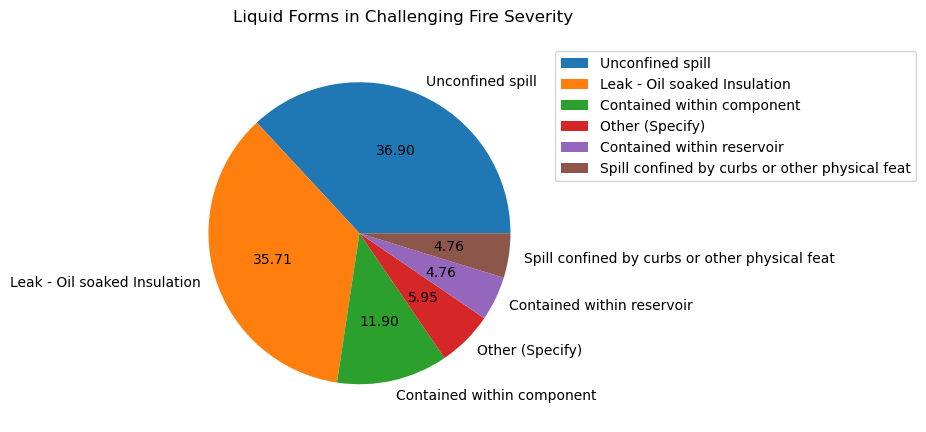

In [53]:
fig_insitu = plt.figure(figsize=(5,5), dpi=100)
ax_insitu = plt.subplot(111)
liq_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_insitu.suptitle('Liquid Forms in Challenging Fire Severity', fontsize=12, x = 0.6, y =0.95)
ax_insitu.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_insitu.savefig(sys_up_dplo + "Liquid Forms pie.png", bbox_inches='tight')

In [54]:
liq_et['Form'] = liq_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_liqchal = liq_et['Form'].value_counts(dropna=False).sum()
print(total_chal)
print(total_liqchal)

insitu_tc = liq_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_liqchal) * 100).round(1)
insitu_tc

540
94


unique_values  counts  percentage  \
0                                Unconfined spill      31         5.7   
1                    Leak - Oil soaked Insulation      30         5.6   
2                      Contained within component      10         1.9   
3                                    Not Labelled      10         1.9   
4                                 Other (Specify)       5         0.9   
5                      Contained within reservoir       4         0.7   
6  Spill confined by curbs or other physical feat       4         0.7   

   percentage_itu  
0            33.0  
1            31.9  
2            10.6  
3            10.6  
4             5.3  
5             4.3  
6             4.3

**Building**

No handles with labels found to put in legend.


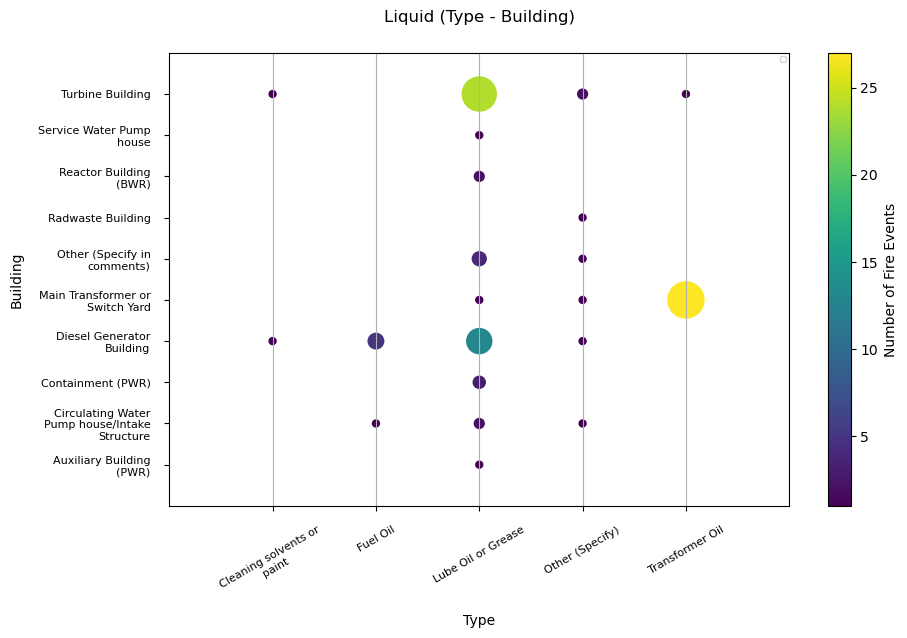

In [55]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


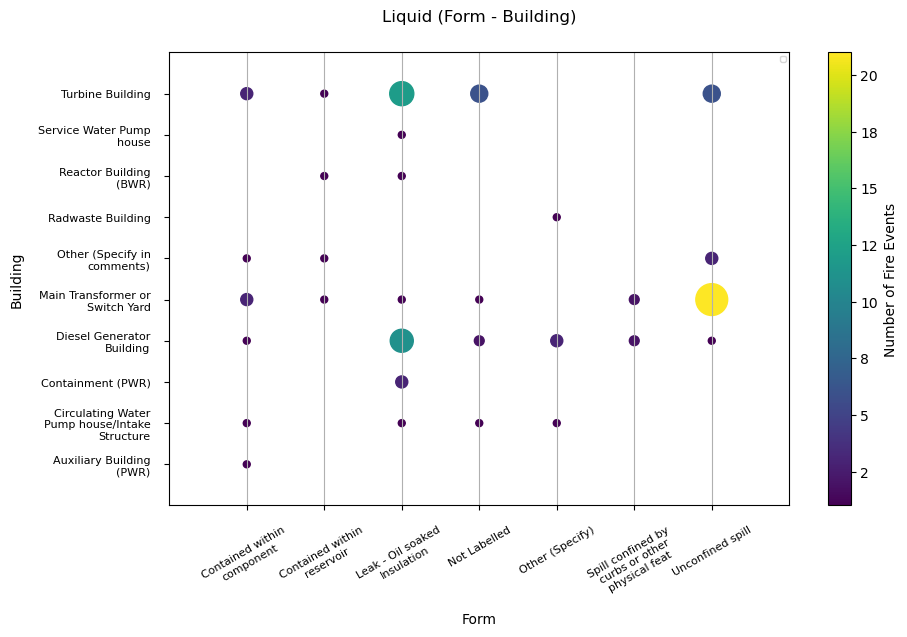

In [56]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


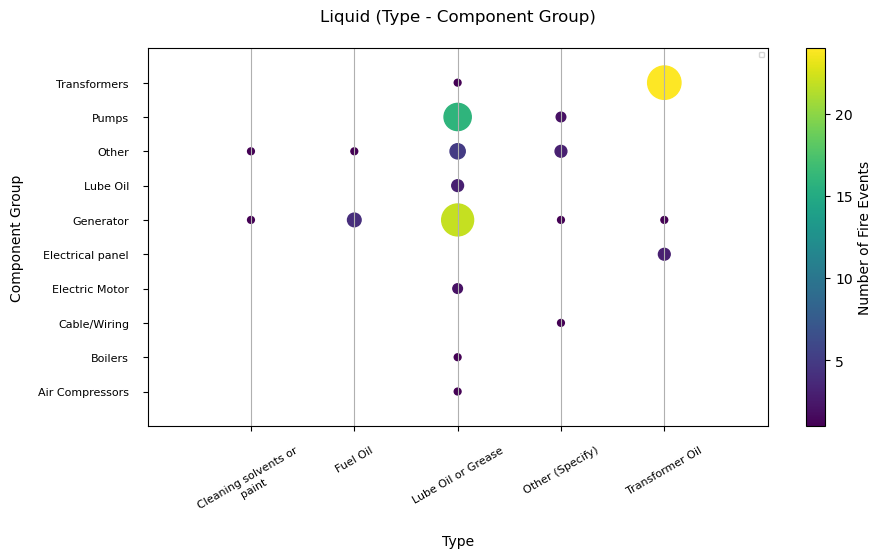

In [57]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [24*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


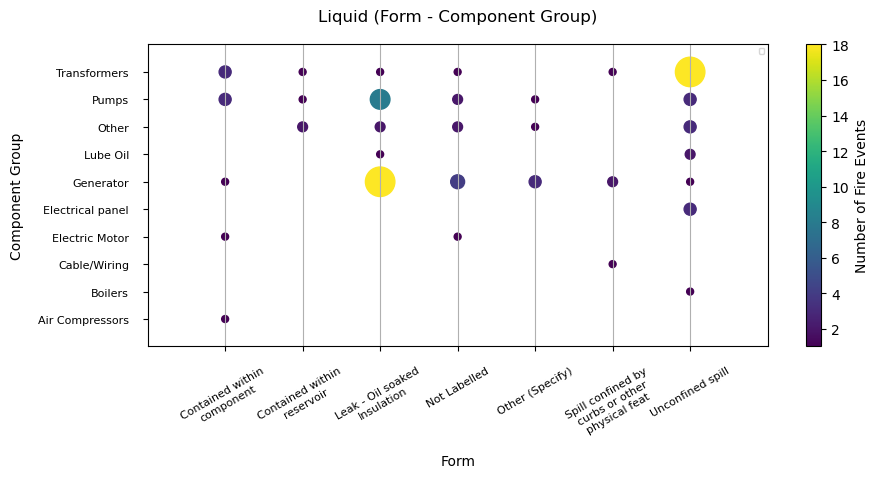

In [58]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


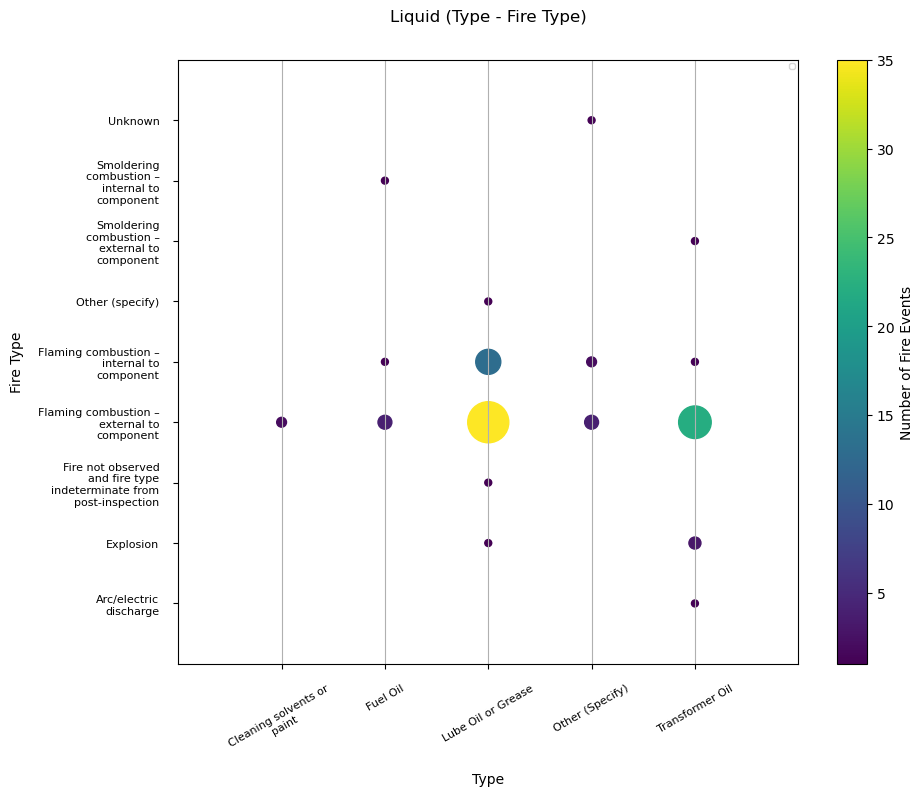

In [59]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


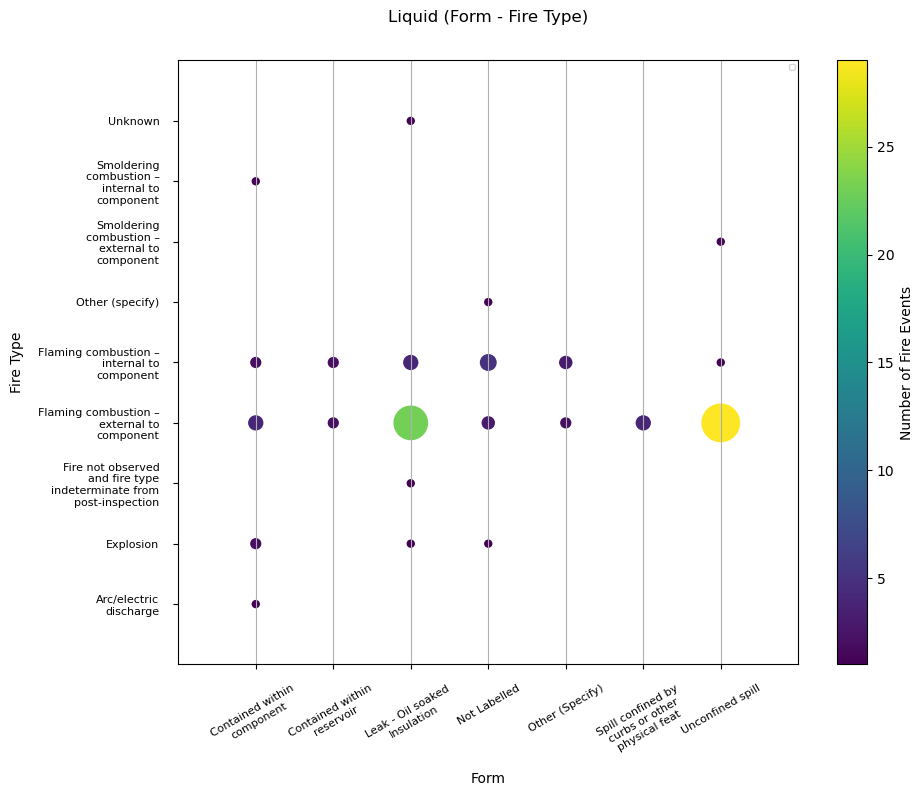

In [60]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Fire Type)', bbox_inches='tight')

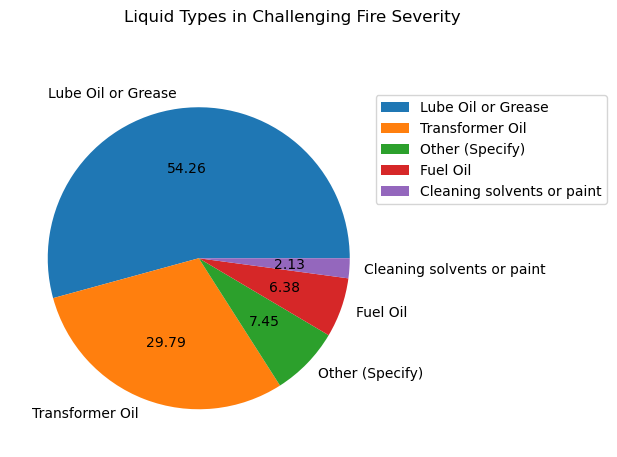

In [61]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(0.95, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Types pie.png", bbox_inches='tight')

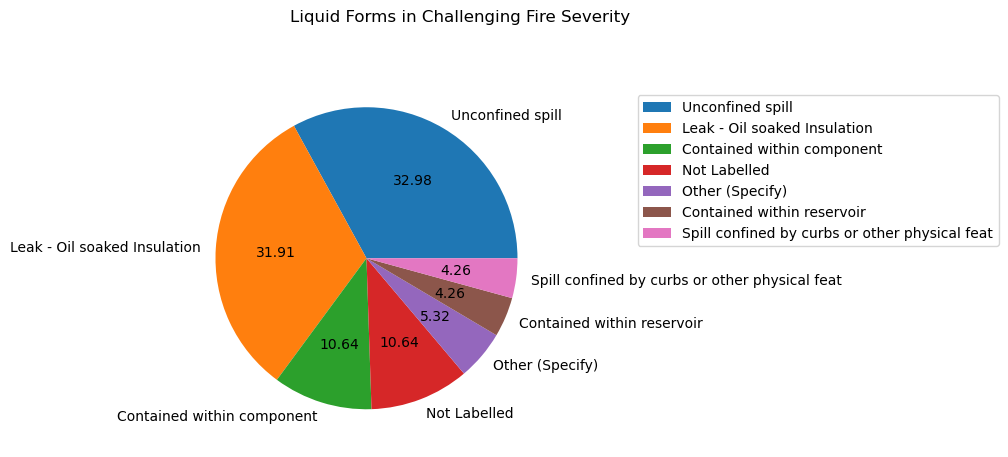

In [62]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Forms in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(1.20, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Forms pie.png", bbox_inches='tight')

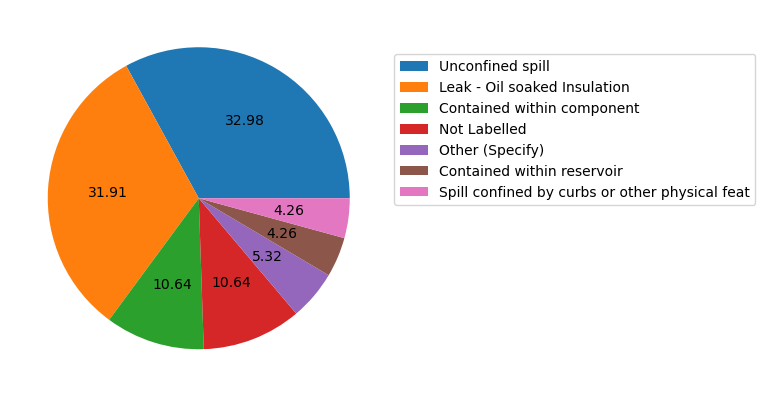

In [63]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='',
                                  labels=None)
#plt.legend(loc='upper left')
#fig_liq.suptitle('Liquid Forms in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(1.0, 0.9), fontsize = 10, labels= liq_et['Form'].value_counts().index)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Forms pie_pp.png", bbox_inches='tight')

# Transient

In [64]:
trans_et['Type'] = trans_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_transchal = trans_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = trans_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_transchal) * 100).round(1)
insitu_tc

540
92


unique_values  counts  percentage  \
0           Temporary electrical wiring or equipment      32         5.9   
1                                    Other (Specify)      17         3.1   
2  Trash (i.e., solid refuse collected for disposal)      16         3.0   
3  Cellulosic materials including wood, paper or ...      13         2.4   
4                                     Plastic Sheets       6         1.1   
5           Other electrical or electronic equipment       3         0.6   
6             Temporary thermal insulation materials       3         0.6   
7                                       Not Labelled       2         0.4   

   percentage_itu  
0            34.8  
1            18.5  
2            17.4  
3            14.1  
4             6.5  
5             3.3  
6             3.3  
7             2.2

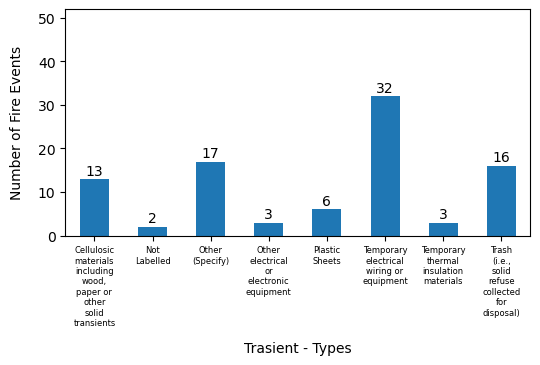

In [65]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_insc  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insc = fig_insc.add_subplot(111)
counts_insc = trans_et['Type'].value_counts().sort_index(ascending=True)
counts_insc.plot(kind='bar')

axes_insc.set_ylim((0, np.max(counts_insc)+20))
axes_insc.set_xticklabels(xlabels, rotation = 0, fontsize=6)
#axes_insc.set_title('Transient Types in Challenging Fire Events', fontsize = 12, x=0.5, y = 1.1)
axes_insc.set_ylabel('Number of Fire Events', labelpad=10)
axes_insc.set_xlabel('Trasient - Types', labelpad=10)

for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_insc.savefig(sys_up_dplo + "Transient Types distribution in Challenging Fire Events_pp.png", bbox_inches='tight')

No handles with labels found to put in legend.


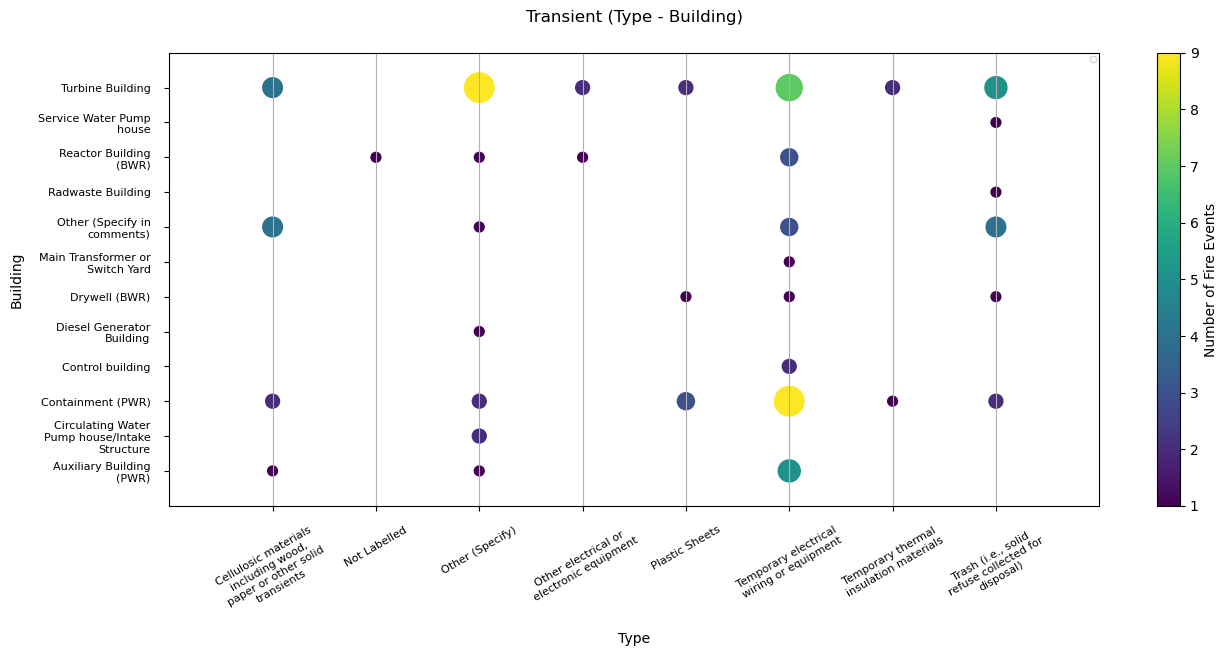

In [66]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


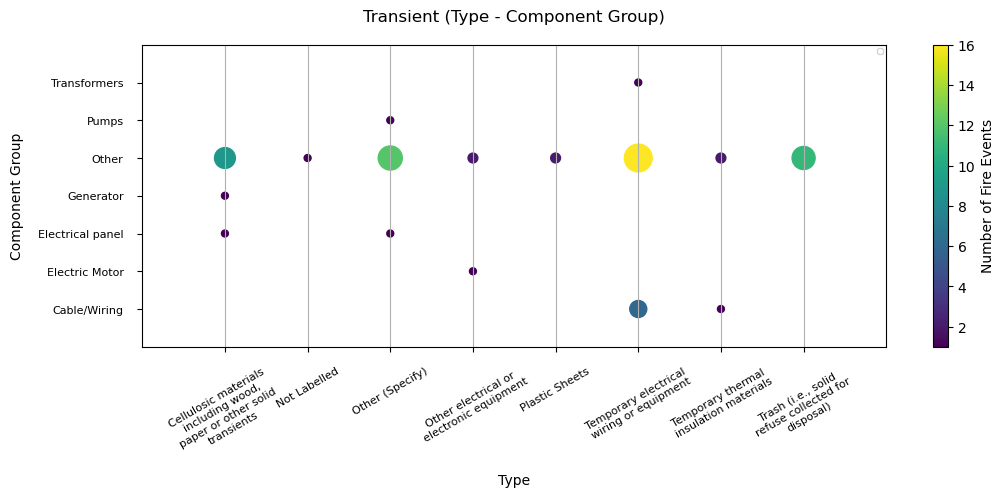

In [67]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


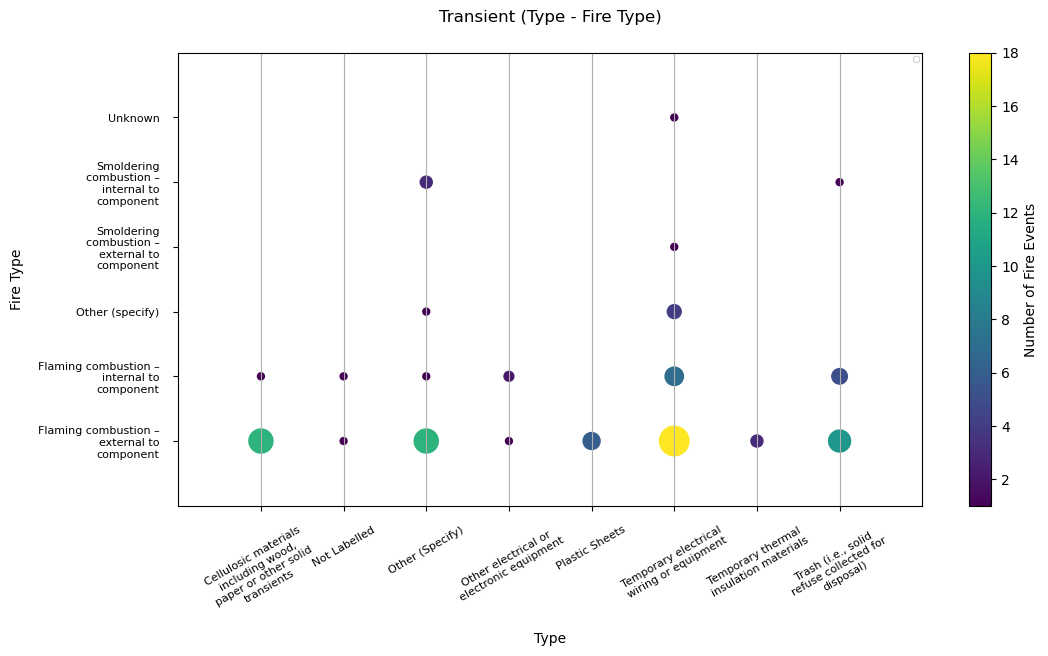

In [68]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Fire Type)', bbox_inches='tight')

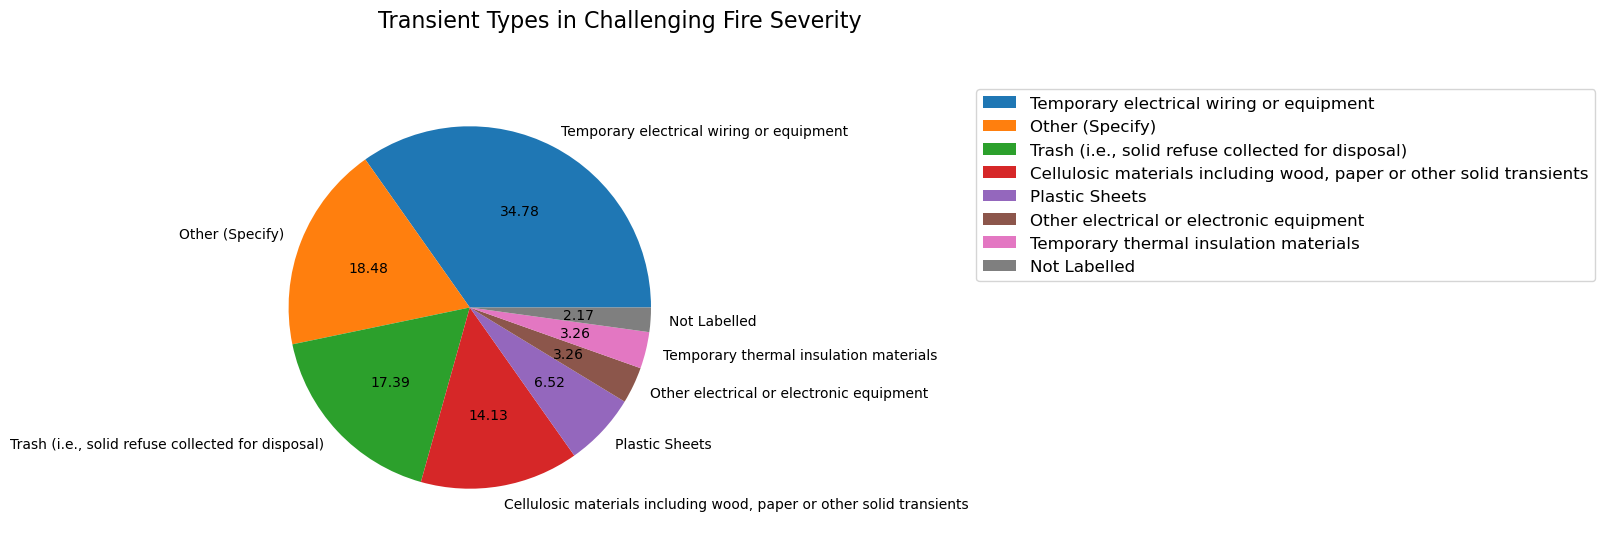

In [69]:
fig_tran = plt.figure(figsize=(8,6), dpi=100)
ax_tran = plt.subplot(111)
trans_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_tran.suptitle('Transient Types in Challenging Fire Severity', fontsize=16, x = 0.7, y =1)
ax_tran.legend(bbox_to_anchor=(1.6, 1), fontsize = 12)
plt.show()
fig_tran.savefig(sys_up_dplo + "Transient Types pie.png", bbox_inches='tight')

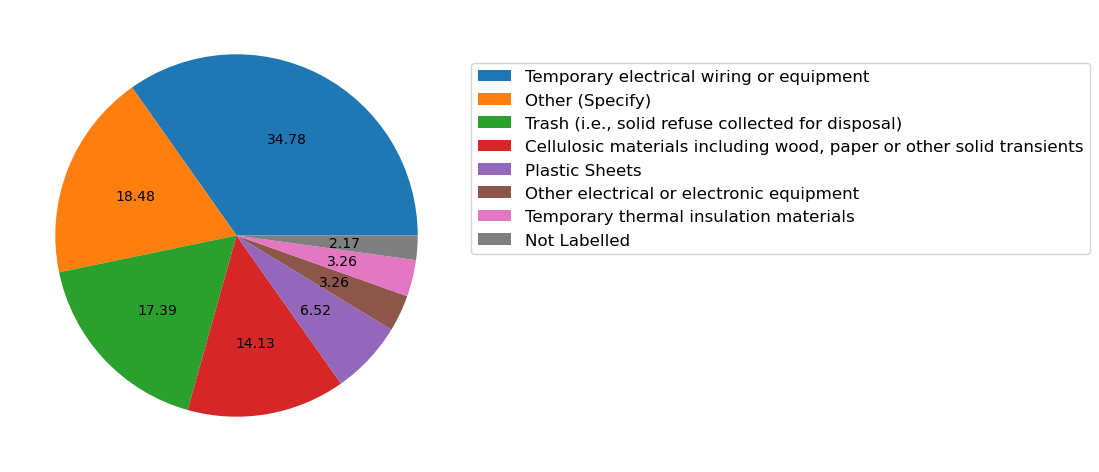

In [70]:
fig_tran = plt.figure(figsize=(8,6), dpi=100)
ax_tran = plt.subplot(111)
trans_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10,
                                     label='', labels=None)
#fig_tran.suptitle('Transient Types in Challenging Fire Severity', fontsize=16, x = 0.7, y =1)
ax_tran.legend(bbox_to_anchor=(1, 0.9), fontsize = 12, labels=trans_et['Type'].value_counts().index)
plt.show()
fig_tran.savefig(sys_up_dplo + "Transient Types pie_pp.png", bbox_inches='tight')

# Insulation

In [71]:
ins_et['Type'] = ins_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = ins_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = ins_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


unique_values  counts  percentage  percentage_itu
0  Type not specified      25         4.6            69.4
1               Mixed       5         0.9            13.9
2        Not Labelled       4         0.7            11.1
3           Thermoset       2         0.4             5.6

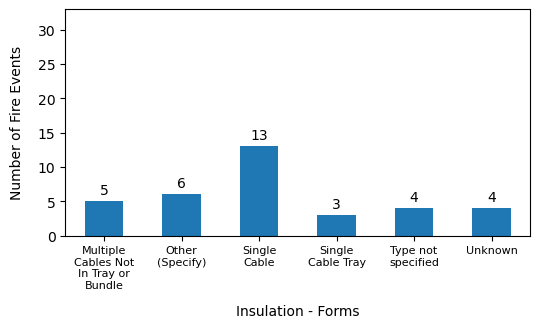

In [72]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_insc  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insc = fig_insc.add_subplot(111)
counts_insc = ins_et['Form'].value_counts().sort_index(ascending=True)
counts_insc.plot(kind='bar')

axes_insc.set_ylim((0, np.max(counts_insc)+20))
axes_insc.set_xticklabels(xlabels, rotation = 0, fontsize=8)
#axes_insc.set_title('Insulation Form in Challenging Fire Events', fontsize = 12, x=0.5, y = 1.1)
axes_insc.set_ylabel('Number of Fire Events', labelpad=10)
axes_insc.set_xlabel('Insulation - Forms', labelpad=10)

for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_insc.savefig(sys_up_dplo + "Insulation Forms distribution in Challenging Fire Events_pp.png", bbox_inches='tight')

In [73]:
ins_et['Form'] = ins_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = ins_et['Form'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = ins_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


unique_values  counts  percentage  percentage_itu
0                           Single Cable      13         2.4            36.1
1                        Other (Specify)       6         1.1            16.7
2  Multiple Cables Not In Tray or Bundle       5         0.9            13.9
3                     Type not specified       4         0.7            11.1
4                                Unknown       4         0.7            11.1
5                      Single Cable Tray       3         0.6             8.3
6                           Not Labelled       1         0.2             2.8

No handles with labels found to put in legend.


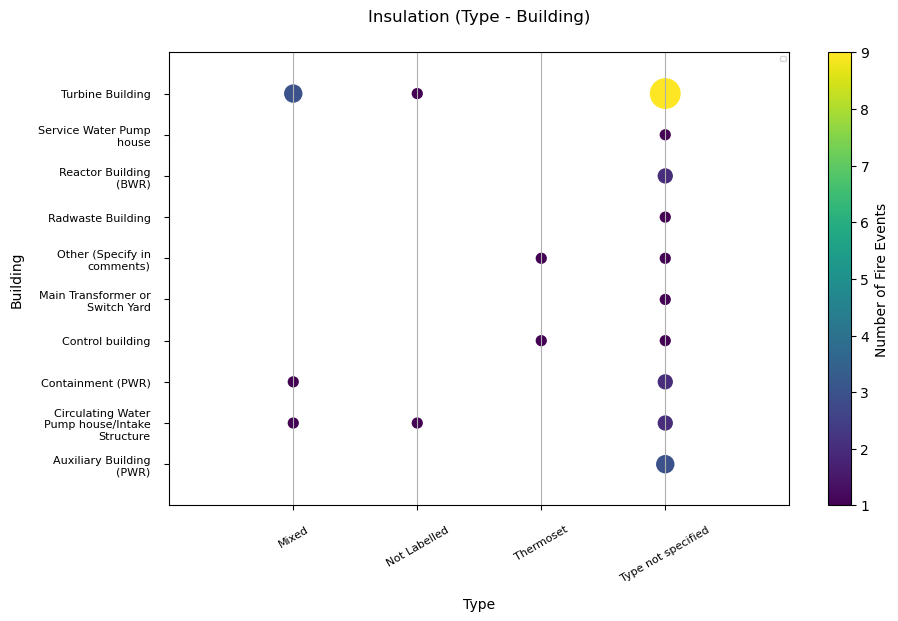

In [74]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


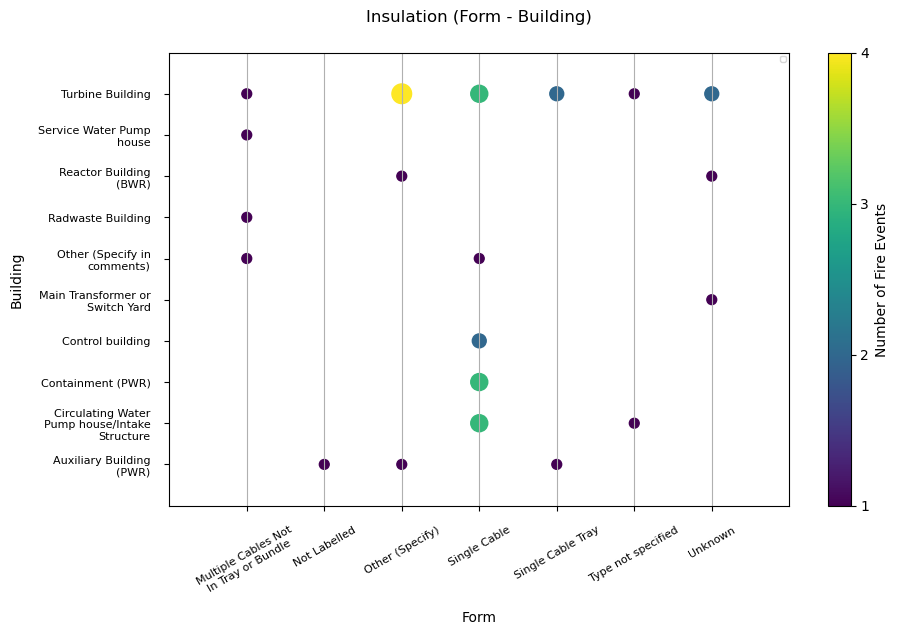

In [75]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks=[0,1,2,3,4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


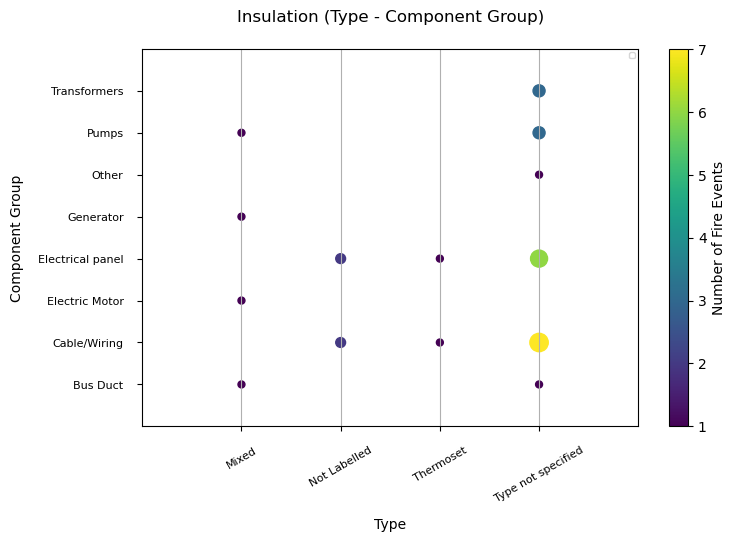

In [76]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


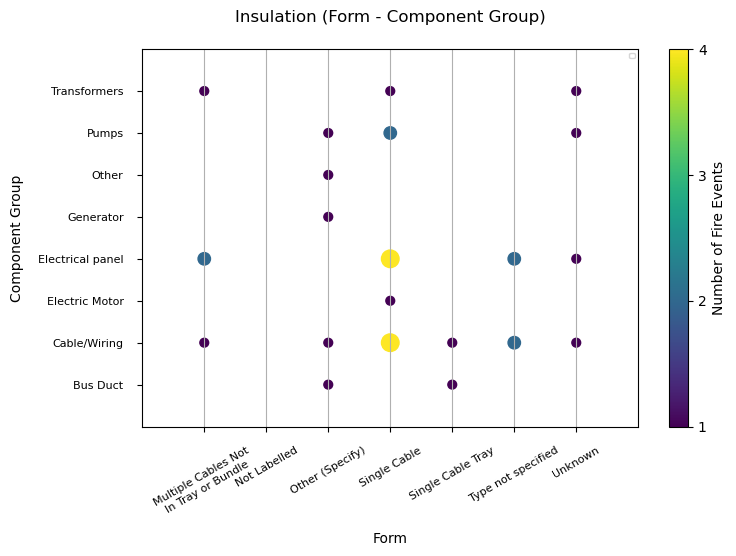

In [77]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [40*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(ticks = [0, 1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


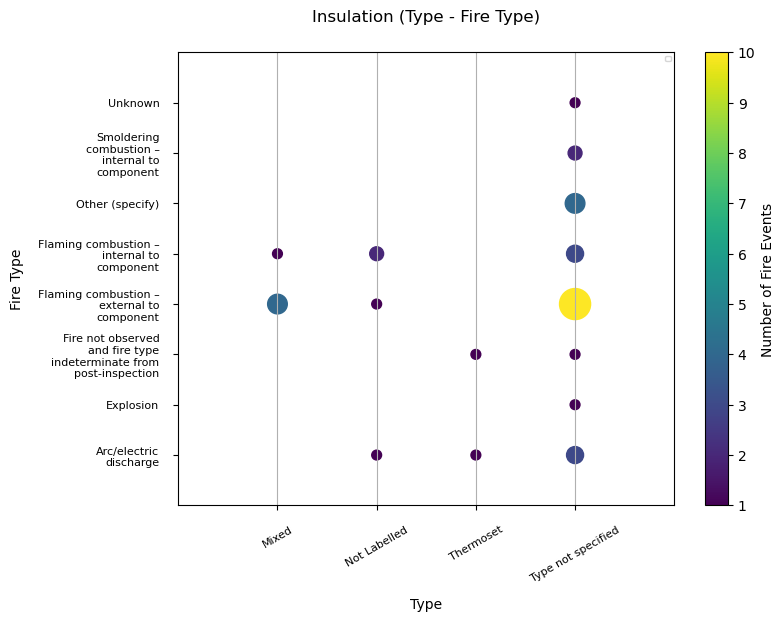

In [78]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


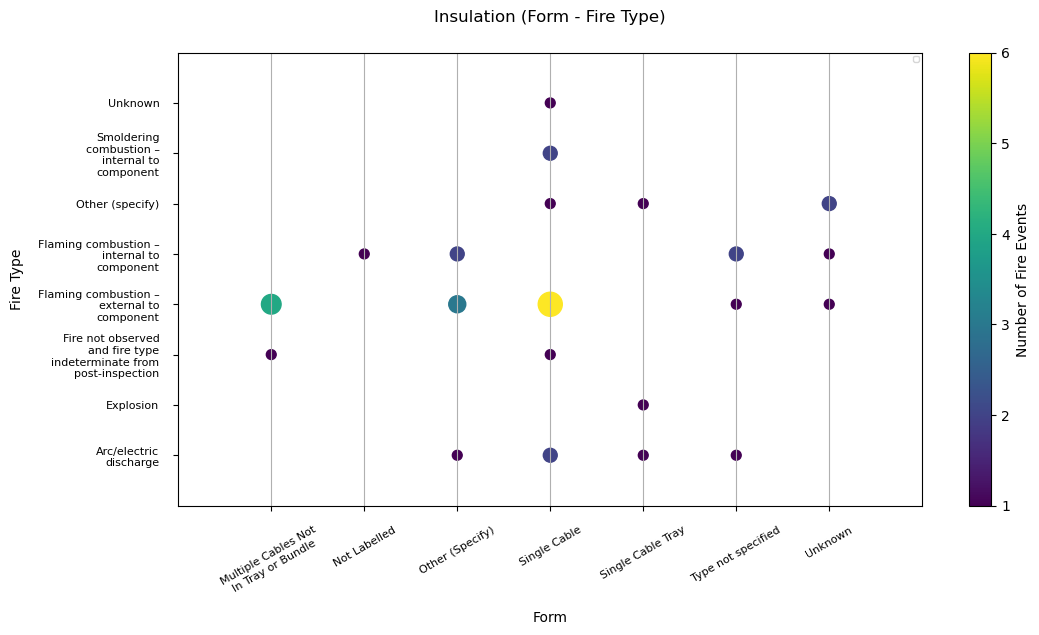

In [79]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Fire Type)', bbox_inches='tight')

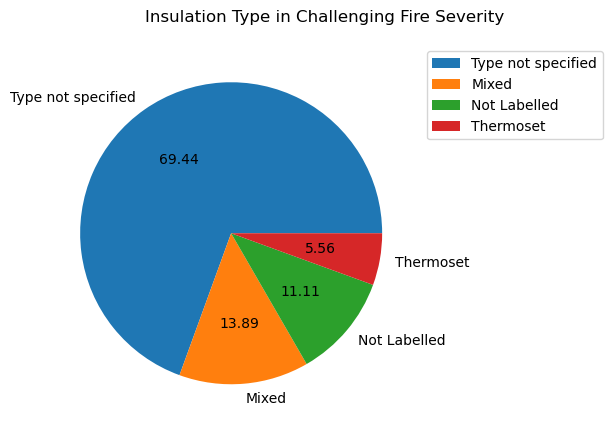

In [80]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Type in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Type pie.png", bbox_inches='tight')

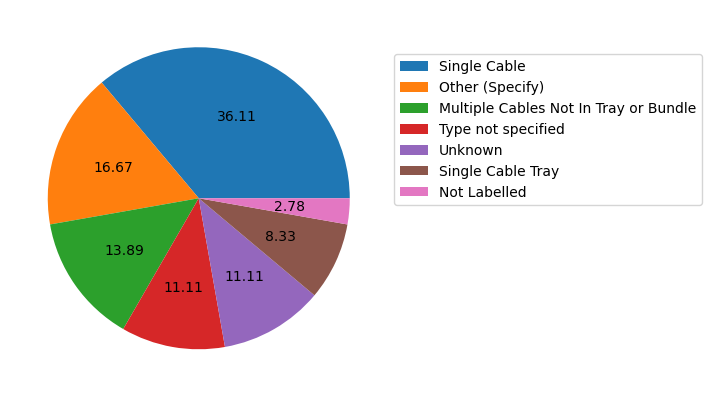

In [81]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10,
                                   label='', labels=None)
#fig_ins.suptitle('Insulation Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 0.9), fontsize = 10, labels=ins_et['Form'].value_counts().index)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Form pie_pp.png", bbox_inches='tight')

# Gas

In [82]:
gas_et['Type'] = gas_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = gas_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = gas_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


unique_values  counts  percentage  percentage_itu
0         Hydrogen      21         3.9            84.0
1  Other (Specify)       3         0.6            12.0
2        Acetylene       1         0.2             4.0

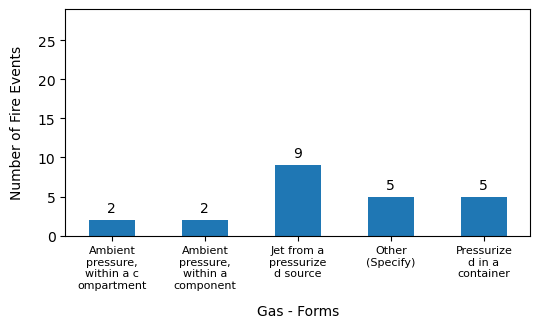

In [83]:
#df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']

xTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())
xlabels = [ '\n'.join(wrap(l, 10)) for l in xTickmarks]

fig_insc  = plt.figure(figsize=(6, 3), dpi = 100) 
axes_insc = fig_insc.add_subplot(111)
counts_insc = gas_et['Form'].value_counts().sort_index(ascending=True)
counts_insc.plot(kind='bar')

axes_insc.set_ylim((0, np.max(counts_insc)+20))
axes_insc.set_xticklabels(xlabels, rotation = 0, fontsize=8)
# axes_insc.set_title('Gas Forms in Challenging Fire Events', fontsize = 12, x=0.5, y = 1.1)
axes_insc.set_ylabel('Number of Fire Events', labelpad=10)
axes_insc.set_xlabel('Gas - Forms', labelpad=10)

for i, d in enumerate(counts_insc):
    plt.text(x=i , y =d+1 , s=f"{d}" , fontdict=dict(fontsize=10), ha = 'center')
    
plt.show()
fig_insc.savefig(sys_up_dplo + "Gas Forms distribution in Challenging Fire Events_pp.png", bbox_inches='tight')

In [84]:
gas_et['Form'] = gas_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = gas_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = gas_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


unique_values  counts  percentage  percentage_itu
0           Jet from a pressurized source       9         1.7            36.0
1                         Other (Specify)       5         0.9            20.0
2              Pressurized in a container       5         0.9            20.0
3                            Not Labelled       2         0.4             8.0
4    Ambient pressure, within a component       2         0.4             8.0
5  Ambient pressure, within a compartment       2         0.4             8.0

No handles with labels found to put in legend.


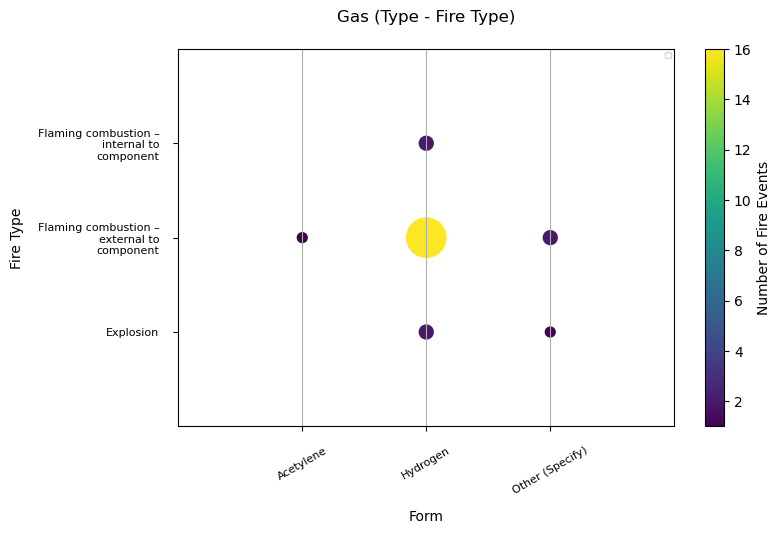

In [85]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


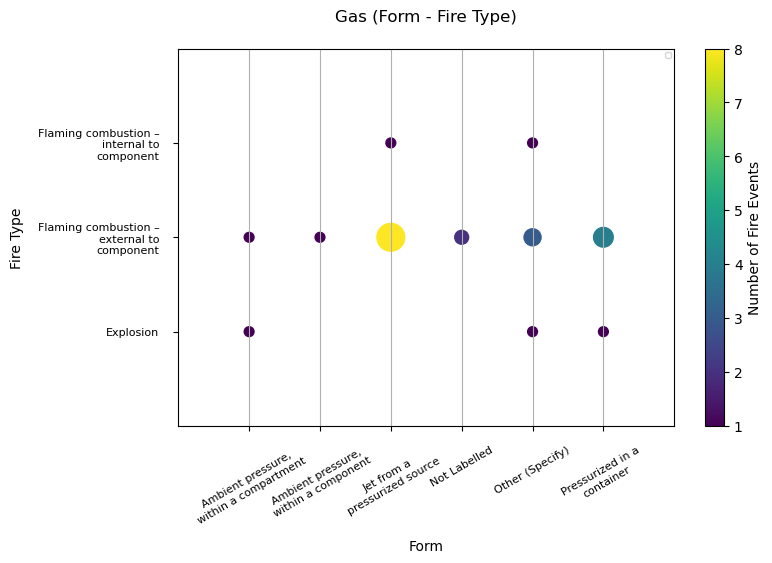

In [86]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


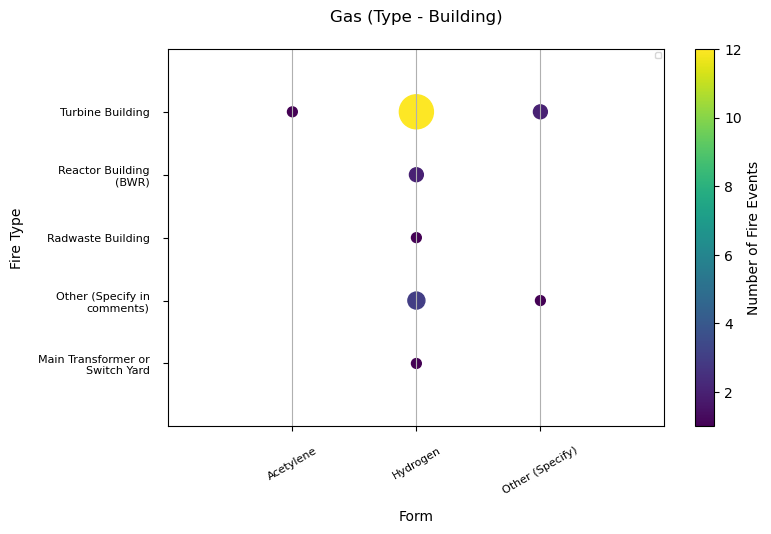

In [87]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


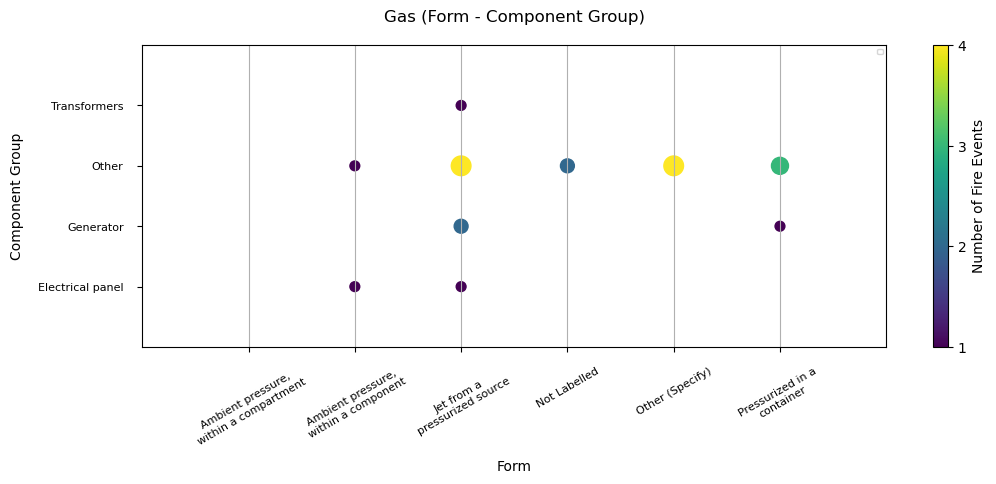

In [88]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks = [1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


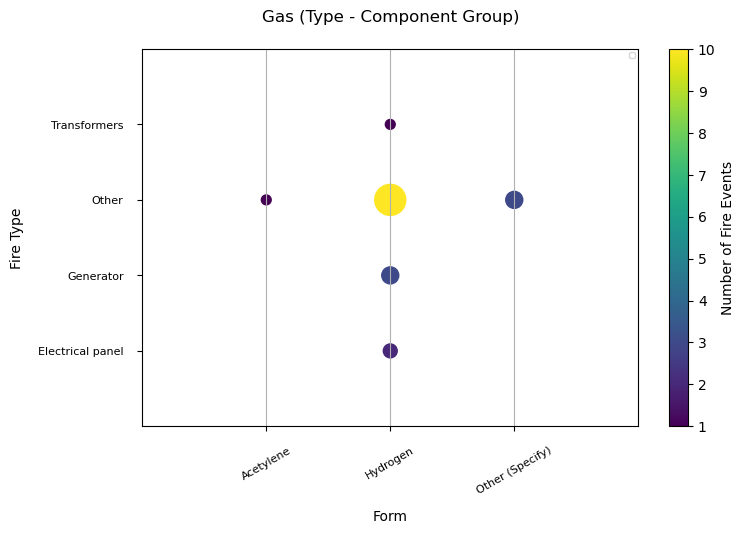

In [89]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type  Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


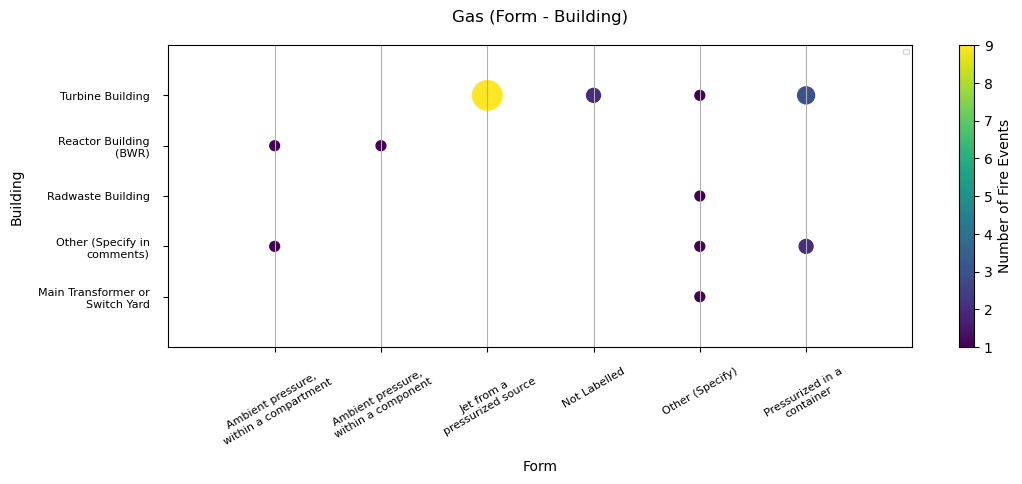

In [90]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Building)', bbox_inches='tight')

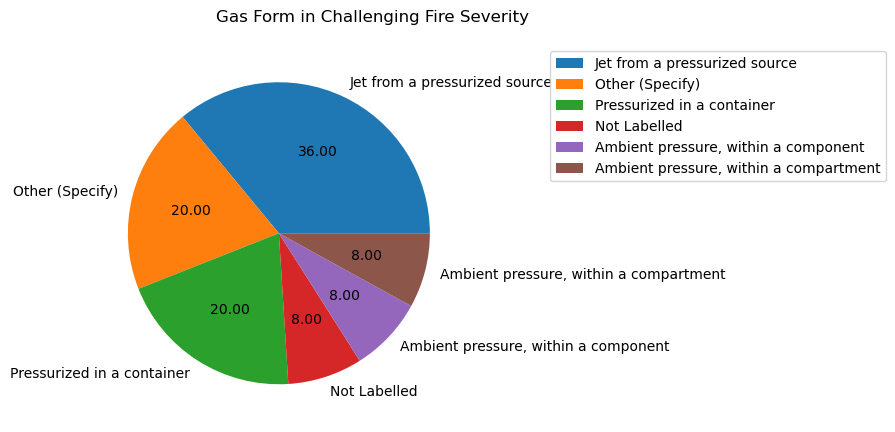

In [91]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
gas_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_gas.suptitle('Gas Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.2, 1), fontsize = 10)
plt.show()
fig_gas.savefig(sys_up_dplo + "Gas Form pie.png", bbox_inches='tight')

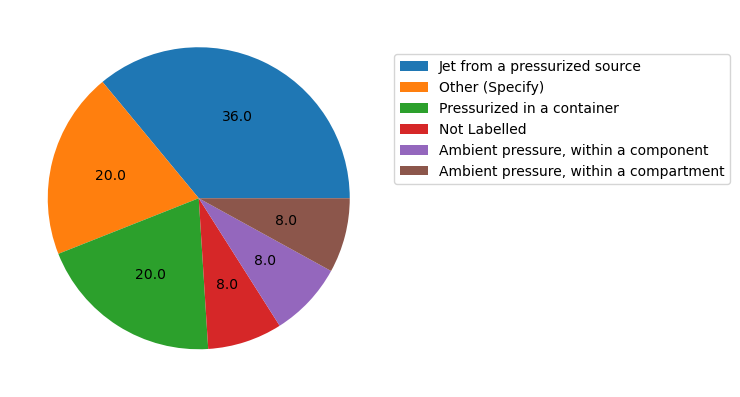

In [92]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
gas_et['Form'].value_counts().plot(kind = 'pie', autopct='%.1f', legend = True, fontsize=10, label = '', labels=None)
#fig_gas.suptitle('Gas Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.0, 0.9), fontsize = 10, labels = gas_et['Form'].value_counts().index)
plt.show()
fig_gas.savefig(sys_up_dplo + "Gas Form pie_pp.png", bbox_inches='tight')

In [93]:
liq_et.groupby(['Type'])['Form'].value_counts()

Type                        Form                                          
Cleaning solvents or paint  Contained within component                         1
                            Unconfined spill                                   1
Fuel Oil                    Leak - Oil soaked Insulation                       2
                            Contained within component                         1
                            Not Labelled                                       1
                            Other (Specify)                                    1
                            Unconfined spill                                   1
Lube Oil or Grease          Leak - Oil soaked Insulation                      26
                            Unconfined spill                                   8
                            Not Labelled                                       6
                            Contained within component                         5
                            Other 

In [94]:
liq_et['Combustible Group'].unique()

array(['Liquid'], dtype=object)

In [95]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Form'])['Type'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Type']  / 540
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(2)
liq_tf_vc

Type  \
Form                                           Type                               
Contained within component                     Lube Oil or Grease             5   
                                               Transformer Oil                3   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   
Contained within reservoir                     Lube Oil or Grease             2   
                                               Other (Specify)                1   
                                               Transformer Oil                1   
Leak - Oil soaked Insulation                   Lube Oil or Grease            26   
                                               Fuel Oil                       2   
                                               Other (Specify)                2   
Not Labelled                                   Lube Oil or Grease             6   
                                               Transformer Oil                2   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Other (Specify)                                Lube Oil or Grease             3   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Spill confined by curbs or other physical feat Other (Specify)                2   
                                               Lube Oil or Grease             1   
                                               Transformer Oil                1   
Unconfined spill                               Transformer Oil               21   
                                               Lube Oil or Grease             8   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   

                                                                           Percentage  
Form                                           Type                                    
Contained within component                     Lube Oil or Grease                0.93  
                                               Transformer Oil                   0.56  
                                               Cleaning solvents or paint        0.19  
                                               Fuel Oil                          0.19  
Contained within reservoir                     Lube Oil or Grease                0.37  
                                               Other (Specify)                   0.19  
                                               Transformer Oil                   0.19  
Leak - Oil soaked Insulation                   Lube Oil or Grease                4.81  
                                               Fuel Oil                          0.37  
                                               Other (Specify)                   0.37  
Not Labelled                                   Lube Oil or Grease                1.11  
                                               Transformer Oil                   0.37  
                                               Fuel Oil                          0.19  
                                               Other (Specify)                   0.19  
Other (Specify)                                Lube Oil or Grease                0.56  
                                               Fuel Oil                          0.19  
                                               Other (Specify)                   0.19  
Spill confined by curbs or other physical feat Other (Specify)                   0.37  
                                               Lube Oil or Grease                0.19  
                                               Transformer Oil      

In [96]:
from matplotlib.patches import Rectangle

In [97]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Type'])['Form'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Form']  / df_em_challenging['Type'].count().sum()
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(1)
liq_tf_vc

Form  \
Type                       Form                                                   
Cleaning solvents or paint Contained within component                         1   
                           Unconfined spill                                   1   
Fuel Oil                   Leak - Oil soaked Insulation                       2   
                           Contained within component                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
                           Unconfined spill                                   1   
Lube Oil or Grease         Leak - Oil soaked Insulation                      26   
                           Unconfined spill                                   8   
                           Not Labelled                                       6   
                           Contained within component                         5   
                           Other (Specify)                                    3   
                           Contained within reservoir                         2   
                           Spill confined by curbs or other physical feat     1   
Other (Specify)            Leak - Oil soaked Insulation                       2   
                           Spill confined by curbs or other physical feat     2   
                           Contained within reservoir                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
Transformer Oil            Unconfined spill                                  21   
                           Contained within component                         3   
                           Not Labelled                                       2   
                           Contained within reservoir                         1   
                           Spill confined by curbs or other physical feat     1   

                                                                           Percentage  
Type                       Form                                                        
Cleaning solvents or paint Contained within component                             0.2  
                           Unconfined spill                                       0.2  
Fuel Oil                   Leak - Oil soaked Insulation                           0.4  
                           Contained within component                             0.2  
                           Not Labelled                                           0.2  
                           Other (Specify)                                        0.2  
                           Unconfined spill                                       0.2  
Lube Oil or Grease         Leak - Oil soaked Insulation                           5.0  
                           Unconfined spill                                       1.5  
                           Not Labelled                                           1.2  
                           Contained within component                             1.0  
                           Other (Specify)                                        0.6  
                           Contained within reservoir                             0.4  
                           Spill confined by curbs or other physical feat         0.2  
Other (Specify)            Leak - Oil soaked Insulation                           0.4  
                           Spill confined by curbs or other physical feat         0.4  
                           Contained within reservoir                             0.2  
                           Not Labelled                                           0.2  
                           Other (Specify)                                        0.2  
Transformer Oil            Unconfined spill                         

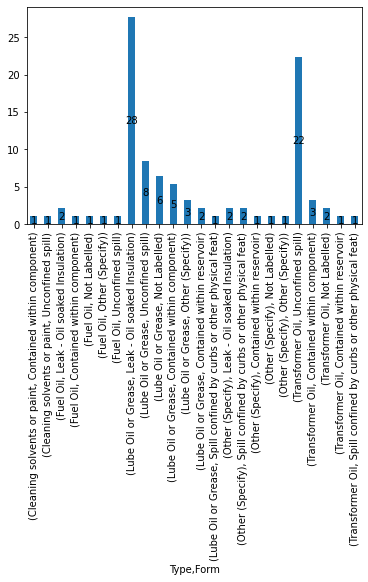

In [98]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Type'])['Form'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Form']  / liq_tf_vc['Form'].sum()
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(1)
ax_liq_tf = liq_tf_vc['Percentage'].plot(kind='bar', stacked = True)
for p in ax_liq_tf.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 0:  # anything that have a height of 0 will not be annotated
            ax_liq_tf.text(x + 0.5 * w, y + 0.5 * h, '%0.0f'%h, va='center', ha='center')
# plt.savefig(sys_up_dplo + 'Combustible Groups-Fire Severity')
plt.show()

In [99]:
liq_tf_vc

Form  \
Type                       Form                                                   
Cleaning solvents or paint Contained within component                         1   
                           Unconfined spill                                   1   
Fuel Oil                   Leak - Oil soaked Insulation                       2   
                           Contained within component                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
                           Unconfined spill                                   1   
Lube Oil or Grease         Leak - Oil soaked Insulation                      26   
                           Unconfined spill                                   8   
                           Not Labelled                                       6   
                           Contained within component                         5   
                           Other (Specify)                                    3   
                           Contained within reservoir                         2   
                           Spill confined by curbs or other physical feat     1   
Other (Specify)            Leak - Oil soaked Insulation                       2   
                           Spill confined by curbs or other physical feat     2   
                           Contained within reservoir                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
Transformer Oil            Unconfined spill                                  21   
                           Contained within component                         3   
                           Not Labelled                                       2   
                           Contained within reservoir                         1   
                           Spill confined by curbs or other physical feat     1   

                                                                           Percentage  
Type                       Form                                                        
Cleaning solvents or paint Contained within component                             1.1  
                           Unconfined spill                                       1.1  
Fuel Oil                   Leak - Oil soaked Insulation                           2.1  
                           Contained within component                             1.1  
                           Not Labelled                                           1.1  
                           Other (Specify)                                        1.1  
                           Unconfined spill                                       1.1  
Lube Oil or Grease         Leak - Oil soaked Insulation                          27.7  
                           Unconfined spill                                       8.5  
                           Not Labelled                                           6.4  
                           Contained within component                             5.3  
                           Other (Specify)                                        3.2  
                           Contained within reservoir                             2.1  
                           Spill confined by curbs or other physical feat         1.1  
Other (Specify)            Leak - Oil soaked Insulation                           2.1  
                           Spill confined by curbs or other physical feat         2.1  
                           Contained within reservoir                             1.1  
                           Not Labelled                                           1.1  
                           Other (Specify)                                        1.1  
Transformer Oil            Unconfined spill                         

In [100]:
pd.DataFrame(liq_et.groupby(['Type', 'Building', 'Component Group'])['Form'].value_counts())

Form
Type                       Building                                      Component Group  Form                                                
Cleaning solvents or paint Diesel Generator Building                     Generator        Contained within component                         1
                           Turbine Building                              Other            Unconfined spill                                   1
Fuel Oil                   Diesel Generator Building                     Generator        Leak - Oil soaked Insulation                       2
                                                                                          Other (Specify)                                    1
                                                                                          Unconfined spill                                   1
                                                                         Other            Not Labelled                                       1
Lube Oil or Grease         Auxiliary Building (PWR)                      Electric Motor   Contained within component                         1
                           Circulating Water Pump house/Intake Structure Pumps            Not Labelled                                       1
                                                                                          Other (Specify)                                    1
                           Containment (PWR)                             Other            Leak - Oil soaked Insulation                       1
                                                                         Pumps            Leak - Oil soaked Insulation                       2
                           Diesel Generator Building                     Generator        Leak - Oil soaked Insulation                       9
                                                                                          Other (Specify)                                    2
                                                                                          Not Labelled                                       1
                                                                                          Spill confined by curbs or other physical feat     1
                           Main Transformer or Switch Yard               Transformers     Leak - Oil soaked Insulation                       1
                           Other (Specify in comments)                   Boilers          Unconfined spill                                   1
                                                                         Other            Unconfined spill                                   1
                                                                         Pumps            Contained within component                         1
                                                                                          Unconfined spill                                   1
                           Reactor Building (BWR)                        Pumps            Contained within reservoir                         1
                                                                                          Leak - Oil soaked Insulation                       1
                           Service Water Pump house                      Pumps            Leak - Oil soaked Insulation                       1
                           Turbine Building                              Air Compressors  Contained within component                         1
                                                                         Electric Motor   Not Labelled                                       1
                                                                         Generator        Leak - Oil soaked Insulation                       7
                                                                                          Not Labelled                                

In [101]:
liq_tf_vc['Percentage'].sum()

100.30000000000001

In [102]:
df_em_challenging['Combustible Group'].count().sum()

540

In [103]:
ins_tf_vc = pd.DataFrame(ins_et.groupby(['Type'])['Form'].value_counts())
ins_tf_vc['Percentage'] = (100 * ins_tf_vc['Form']  / df_em_challenging['Type'].count().sum()).round(1)
ins_tf_vc.to_excel(sys_up_data + 'ins_types_forms.xlsx')
ins_tf_vc

Form  Percentage
Type               Form                                                   
Mixed              Other (Specify)                           3         0.6
                   Single Cable                              2         0.4
Not Labelled       Type not specified                        4         0.8
Thermoset          Single Cable                              2         0.4
Type not specified Single Cable                              9         1.7
                   Multiple Cables Not In Tray or Bundle     5         1.0
                   Unknown                                   4         0.8
                   Other (Specify)                           3         0.6
                   Single Cable Tray                         3         0.6
                   Not Labelled                              1         0.2

In [104]:
ins_tf_vc['Percentage'].sum()

7.1

In [105]:
gas_tf_vc = pd.DataFrame(gas_et.groupby(['Type'])['Form'].value_counts())
gas_tf_vc['Percentage'] = (100 * gas_tf_vc['Form']  / df_em_challenging['Type'].count().sum()).round(1)
gas_tf_vc.to_excel(sys_up_data + 'gas_type_form.xlsx')
gas_tf_vc

Form  Percentage
Type            Form                                                    
Acetylene       Not Labelled                               1         0.2
Hydrogen        Jet from a pressurized source              9         1.7
                Pressurized in a container                 4         0.8
                Other (Specify)                            3         0.6
                Ambient pressure, within a compartment     2         0.4
                Ambient pressure, within a component       2         0.4
                Not Labelled                               1         0.2
Other (Specify) Other (Specify)                            2         0.4
                Pressurized in a container                 1         0.2

In [106]:
gas_tf_vc['Percentage'].sum()

4.9

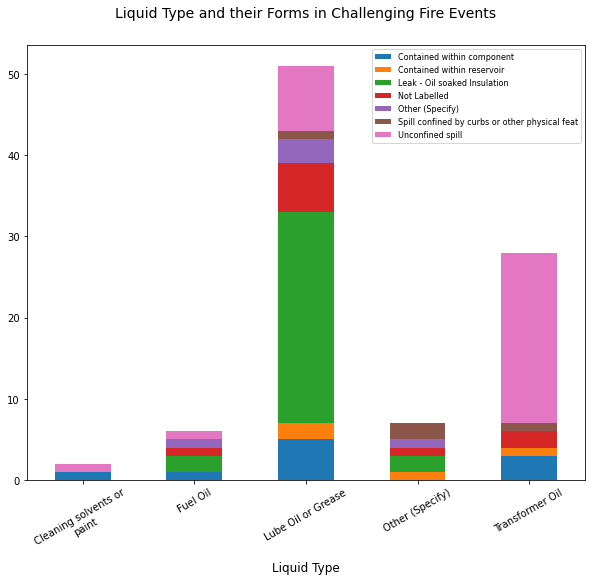

In [107]:
lqtf       = liq_et.groupby(['Type'])['Form'].value_counts()
ax_lqtf    = lqtf.unstack().plot(kind='bar', stacked = True, figsize = (10,8))
xTickmarks = sorted(liq_et['Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_lqtf.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_lqtf.set_xlabel('Liquid Type', fontsize = 12)
ax_lqtf.legend(prop={'size':8}, ncol=1)
ax_lqtf.set_title('Liquid Type and their Forms in Challenging Fire Events', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Liquid Type - Form Challenging Fire Events')
plt.show()

# Reactor Years

In [108]:
EPRI_up['year'].value_counts().sort_index(ascending=True)
EPRI_up.columns

Index(['Unnamed: 0', 'FireID', 'Event Date_FES', 'Disposition_FES',
       'Outside PA', 'Plant Area', 'Building', 'System', 'Component Group',
       'Component', 'Voltage', 'Current Type', 'HP or kVA', 'ICES Component',
       'Event Date_FEA', 'Disposition_FEA', 'Fire Cause', 'Combustible Group',
       'Type', 'Form', 'Fire Type', 'Smoke', 'Temperature', 'Damage Extent',
       'Collateral Damage', 'Collateral Damage.1', 'Feet Above',
       'Feet Laterally', 'Collateral Description', 'Suppression Effects',
       'Evidence of secondary ignition', 'Smoke.1', 'Heat Damage',
       'Event Date_FSE', 'Disposition_FSE', 'Review Status:',
       'Automatic Determination', 'Unnamed: 5', 'Unnamed: 6', 'Override',
       'Comment on Disposition', 'Automatic Determination Basis',
       'Event Date_FTS', 'Disposition_FTS', 'Ignition', 'Discovery',
       'Duration Certainty', 'Duration', 'Suppression Time',
       'Detection Method', 'Detection Performance', 'Suppression Method',
       'Su

In [109]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_old_chal = EPRI_up[EPRI_up['Disposition_FES'] == 'Challenging']

In [110]:
ChPc_counts = pd.DataFrame(df_em_challenging.groupby(['year'])['Disposition_new'].value_counts())
# Ch_counts = pd.DataFrame(df_em_old_chal.groupby(['year'])['Disposition_FES'].value_counts().reindex(df_em_old_chal.year.unique(), fill_value=0))
# #Chal_counts['CRY'] = Chal_counts['Disposition_new']/1081
# #Chal_counts.loc[Chal_counts.year>1999,'Disposition_new':]= Chal_counts.Disposition_new/850
# Ch_counts


In [111]:
df_Cc = EPRI_up.loc[EPRI_up.Disposition_FES == 'Challenging', 'year'].value_counts().reindex(
    EPRI_up.year.unique(), fill_value=0).sort_index(ascending=True)
df_CCC = df_Cc.to_list()
Ch_counts = df_CCC[0:25]
print(df_CCC)
print(df_CCC[0:25])

[5, 2, 6, 1, 5, 4, 5, 2, 0, 1, 6, 4, 4, 5, 4, 3, 2, 3, 7, 4, 9, 4, 3, 10, 2, 0]
[5, 2, 6, 1, 5, 4, 5, 2, 0, 1, 6, 4, 4, 5, 4, 3, 2, 3, 7, 4, 9, 4, 3, 10, 2]


In [112]:
df_cr = pd.DataFrame({"Year":sorted(df_em_challenging['year'].unique().astype(int)),
             "Chal_PotChal":ChPc_counts['Disposition_new'].to_list(),
                     "Chal": Ch_counts})
df_cr["Updated FEDB CH&PC + 0.5U"] = (df_cr['Chal_PotChal']/1081).round(3)
df_cr['Updated FEDB CH'] = (df_cr['Chal']/1081).round(3)
df_cr

Year  Chal_PotChal  Chal  Updated FEDB CH&PC + 0.5U  Updated FEDB CH
0   1990            23     5                      0.021            0.005
1   1991            11     2                      0.010            0.002
2   1992            17     6                      0.016            0.006
3   1993            13     1                      0.012            0.001
4   1994            16     5                      0.015            0.005
5   1995             9     4                      0.008            0.004
6   1996            14     5                      0.013            0.005
7   1997             9     2                      0.008            0.002
8   1998             7     0                      0.006            0.000
9   1999             7     1                      0.006            0.001
10  2000            42     6                      0.039            0.006
11  2001            35     4                      0.032            0.004
12  2002            28     4                      0.026            0.004
13  2003            32     5                      0.030            0.005
14  2004            22     4                      0.020            0.004
15  2005            36     3                      0.033            0.003
16  2006            24     2                      0.022            0.002
17  2007            25     3                      0.023            0.003
18  2008            24     7                      0.022            0.006
19  2009            28     4                      0.026            0.004
20  2010            34     9                      0.031            0.008
21  2011            19     4                      0.018            0.004
22  2012            20     3                      0.019            0.003
23  2013            31    10                      0.029            0.009
24  2014            14     2                      0.013            0.002

In [113]:
df_cr.loc[df_cr.Year>1999, "Updated FEDB CH&PC + 0.5U"] = (df_cr.Chal_PotChal/850).round(3)
df_cr.loc[df_cr.Year>1999, "Updated FEDB CH"] = (df_cr.Chal/850).round(5)
df_cr_copy = df_cr

In [114]:
df_cr_copy = df_cr_copy.set_index('Year')
df_cr_copy

Chal_PotChal  Chal  Updated FEDB CH&PC + 0.5U  Updated FEDB CH
Year                                                                
1990            23     5                      0.021          0.00500
1991            11     2                      0.010          0.00200
1992            17     6                      0.016          0.00600
1993            13     1                      0.012          0.00100
1994            16     5                      0.015          0.00500
1995             9     4                      0.008          0.00400
1996            14     5                      0.013          0.00500
1997             9     2                      0.008          0.00200
1998             7     0                      0.006          0.00000
1999             7     1                      0.006          0.00100
2000            42     6                      0.049          0.00706
2001            35     4                      0.041          0.00471
2002            28     4                      0.033          0.00471
2003            32     5                      0.038          0.00588
2004            22     4                      0.026          0.00471
2005            36     3                      0.042          0.00353
2006            24     2                      0.028          0.00235
2007            25     3                      0.029          0.00353
2008            24     7                      0.028          0.00824
2009            28     4                      0.033          0.00471
2010            34     9                      0.040          0.01059
2011            19     4                      0.022          0.00471
2012            20     3                      0.024          0.00353
2013            31    10                      0.036          0.01176
2014            14     2                      0.016          0.00235

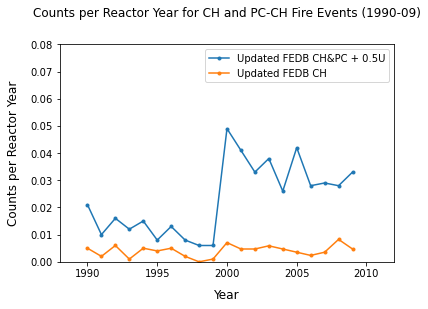

In [115]:
df_cr2 = df_cr_copy.loc[1990:2009]
ax = df_cr2.plot(y=['Updated FEDB CH&PC + 0.5U', 'Updated FEDB CH'], style='.-')
ax.set_xlim(1988,2012)
ax.set_ylim(0, 0.08)
ax.set_ylabel('Counts per Reactor Year', labelpad=10, fontsize=12)
ax.set_xlabel('Year', labelpad=10, fontsize=12)
ax.set_title('Counts per Reactor Year for CH and PC-CH Fire Events (1990-09)', fontsize=12, y=1.1)
plt.savefig(sys_up_dplo + 'Counts per Reactor Year for CH and PC-CH Fire Events (1990-09)', bbox_inches='tight')
plt.show()

In [116]:
EPRI_up['Disposition_new'].unique()

array([nan, 'Not Challenging', 'Challenging', 'Not Evaluated'],
      dtype=object)

In [117]:
EPRI_up.groupby(['Type', 'Fire Type'])['Fire Type'].count()

Type                                                                  Fire Type                                                         
Acetylene                                                             Flaming combustion – external to component                             1
Cellulosic materials including wood, paper or other solid transients  Arc/electric discharge                                                 1
                                                                      Fire not observed and fire type indeterminate from post‐inspection     1
                                                                      Flaming combustion – external to component                            86
                                                                      Flaming combustion – internal to component                             9
                                                                                                                                            ..
Type 

In [118]:
St_cp = EPRI_up[EPRI_up['Type'] == 'Structural component']

In [119]:
St_cp.groupby(['Component Group'])['Fire Cause'].value_counts()

Component Group   Fire Cause                                                             
Air Compressors   Electrical failure resulting in overheating materials                      1
                  Unknown                                                                    1
Boilers           Overheated Material (lube oil, pump packing, thermal insulation, etc.)     1
Bus Duct          Electrical arcing or sparks (non-HEAF)                                     1
Crane             Other (other personnel error, natural effect, etc. specify in comments)    1
                  Overheated Material (lube oil, pump packing, thermal insulation, etc.)     1
Electric Motor    Mechanical equipment malfunction/failure                                   5
                  Electrical failure resulting in overheating materials                      1
                  Overheated Material (lube oil, pump packing, thermal insulation, etc.)     1
                  Unknown                              

In [120]:
c_sc = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellowgreen', 'cyan', 'beige']

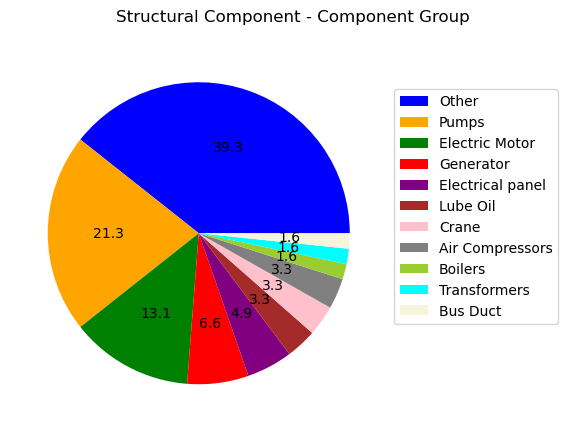

In [121]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
St_cp['Component Group'].value_counts().plot(kind = 'pie', autopct='%.1f', legend = True, fontsize=10, 
                                             label = '', labels=None, colors = c_sc)
fig_gas.suptitle('Structural Component - Component Group', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.0, 0.9), fontsize = 10, labels = St_cp['Component Group'].value_counts().index)
plt.show()
fig_gas.savefig(sys_up_dplo + "Structural Component - Component Group pie_pp.png", bbox_inches='tight')

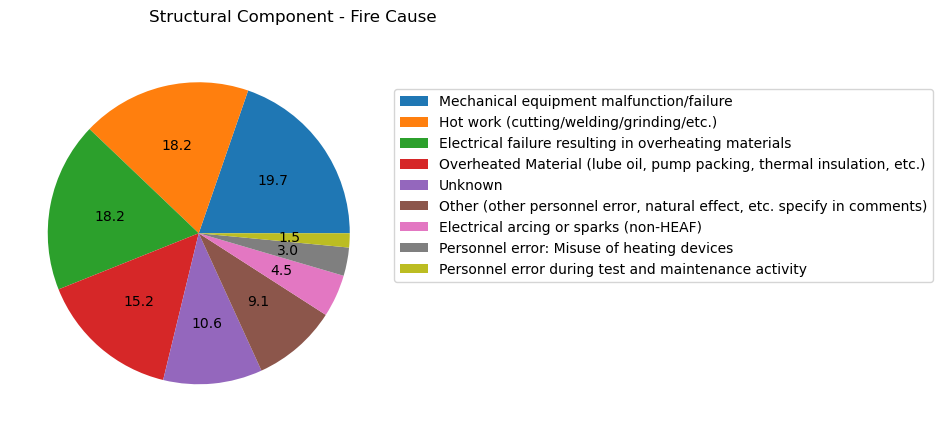

In [122]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
St_cp['Fire Cause'].value_counts().plot(kind = 'pie', autopct='%.1f', legend = True, fontsize=10, 
                                             label = '', labels=None)
fig_gas.suptitle('Structural Component - Fire Cause', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.0, 0.9), fontsize = 10, labels = St_cp['Fire Cause'].value_counts().index)
plt.show()
fig_gas.savefig(sys_up_dplo + "Structural Component - pie_pp.png", bbox_inches='tight')

In [123]:
EPRI_up.columns

Index(['Unnamed: 0', 'FireID', 'Event Date_FES', 'Disposition_FES',
       'Outside PA', 'Plant Area', 'Building', 'System', 'Component Group',
       'Component', 'Voltage', 'Current Type', 'HP or kVA', 'ICES Component',
       'Event Date_FEA', 'Disposition_FEA', 'Fire Cause', 'Combustible Group',
       'Type', 'Form', 'Fire Type', 'Smoke', 'Temperature', 'Damage Extent',
       'Collateral Damage', 'Collateral Damage.1', 'Feet Above',
       'Feet Laterally', 'Collateral Description', 'Suppression Effects',
       'Evidence of secondary ignition', 'Smoke.1', 'Heat Damage',
       'Event Date_FSE', 'Disposition_FSE', 'Review Status:',
       'Automatic Determination', 'Unnamed: 5', 'Unnamed: 6', 'Override',
       'Comment on Disposition', 'Automatic Determination Basis',
       'Event Date_FTS', 'Disposition_FTS', 'Ignition', 'Discovery',
       'Duration Certainty', 'Duration', 'Suppression Time',
       'Detection Method', 'Detection Performance', 'Suppression Method',
       'Su

In [124]:
EPRI_up['year']

0       2006.0
1       1999.0
2       1999.0
3          NaN
4       1999.0
         ...  
2340       NaN
2341       NaN
2342       NaN
2343       NaN
2344       NaN
Name: year, Length: 2345, dtype: float64

In [125]:
EPRI_up['Event Date_FES'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2340     True
2341     True
2342     True
2343     True
2344     True
Name: Event Date_FES, Length: 2345, dtype: bool

In [126]:
EPRI_up.loc[EPRI_up['Event Date_FES'].duplicated(), :]

Unnamed: 0  FireID Event Date_FES Disposition_FES Outside PA Plant Area  \
9              9    10.0            NaT             NaN        NaN        NaN   
155          155   156.0            NaT             NaN        NaN        NaN   
164          164   165.0            NaT             NaN        NaN        NaN   
165          165   166.0            NaT             NaN        NaN        NaN   
166          166   167.0            NaT             NaN        NaN        NaN   
...          ...     ...            ...             ...        ...        ...   
2340        2340     NaN            NaT             NaN        NaN        NaN   
2341        2341     NaN            NaT             NaN        NaN        NaN   
2342        2342     NaN            NaT             NaN        NaN        NaN   
2343        2343     NaN            NaT             NaN        NaN        NaN   
2344        2344     NaN            NaT             NaN        NaN        NaN   

     Building System Component Group Component  ... Event Date_PR  \
9         NaN    NaN             NaN       NaN  ...           NaN   
155       NaN    NaN             NaN       NaN  ...           NaN   
164       NaN    NaN             NaN       NaN  ...           NaN   
165       NaN    NaN             NaN       NaN  ...           NaN   
166       NaN    NaN             NaN       NaN  ...           NaN   
...       ...    ...             ...       ...  ...           ...   
2340      NaN    NaN             NaN       NaN  ...           NaN   
2341      NaN    NaN             NaN       NaN  ...           NaN   
2342      NaN    NaN             NaN       NaN  ...           NaN   
2343      NaN    NaN             NaN       NaN  ...           NaN   
2344      NaN    NaN             NaN       NaN  ...           NaN   

     Disposition_PR  Mode Prior Mode After Power Level Prior  \
9               NaN         NaN        NaN               NaN   
155             NaN         NaN        NaN               NaN   
164             NaN         NaN        NaN               NaN   
165             NaN         NaN        NaN               NaN   
166             NaN         NaN        NaN               NaN   
...             ...         ...        ...               ...   
2340            NaN         NaN        NaN               NaN   
2341            NaN         NaN        NaN               NaN   
2342            NaN         NaN        NaN               NaN   
2343            NaN         NaN        NaN               NaN   
2344            NaN         NaN        NaN               NaN   

     Power Level After Power Effect EAL Declaration Disposition_new year  
9                  NaN          NaN             NaN             NaN  NaN  
155                NaN          NaN             NaN             NaN  NaN  
164                NaN          NaN             NaN             NaN  NaN  
165                NaN          NaN             NaN             NaN  NaN  
166                NaN          NaN             NaN             NaN  NaN  
...                ...          ...             ...             ...  ...  
2340               NaN          NaN             NaN             NaN  NaN  
2341               NaN          NaN             NaN             NaN  NaN  
2342               NaN          NaN             NaN             NaN  NaN  
2343               NaN          NaN             NaN             NaN  NaN  
2344               NaN          NaN             NaN             NaN  NaN  

[640 rows x 69 columns]

In [127]:
EPRI_up = EPRI_up.dropna(subset = ['FireID'], how='all')

In [128]:
EPRI_up.shape

(2335, 69)

In [129]:
#EPRI_up_dt_nat = EPRI_up[EPRI_up['Event Date_FES'].isnull()]

In [130]:
EPRI_up = EPRI_up[~EPRI_up['Event Date_FES'].isnull()]

In [131]:
EPRI_up.shape

(2111, 69)

In [132]:
print(EPRI_up.duplicated(subset=['Event Date_FES', 'FireID']).sum())
print(EPRI_up['Event Date_FES'].duplicated().sum())

1
407


In [133]:
EPRI_up.loc[EPRI_up['Event Date_FES'].duplicated(), :]

Unnamed: 0   FireID Event Date_FES          Disposition_FES Outside PA  \
168          168    169.0     2003-11-13  Potentially Challenging         No   
194          194    195.0     1992-03-21          Not Challenging         No   
246          246    247.0     1994-01-12     Undetermined (PC‐CH)         No   
276          276    277.0     2003-11-02          Not Challenging         No   
309          309    310.0     2005-11-18          Not Challenging         No   
...          ...      ...            ...                      ...        ...   
2203        2203  50917.0     2010-07-13  Potentially Challenging        NaN   
2231        2231  50986.0     2010-03-28              Challenging        NaN   
2260        2260  51132.0     2012-04-02  Potentially Challenging        NaN   
2284        2284  51190.0     2012-04-02  Potentially Challenging        NaN   
2330        2330  51354.0     2010-03-28  Potentially Challenging        NaN   

               Plant Area                                       Building  \
168                   NaN  Circulating Water Pump house/Intake Structure   
194                   NaN                               Turbine Building   
246                   NaN                               Turbine Building   
276   Containment/Drywell                              Containment (PWR)   
309   Containment/Drywell                              Containment (PWR)   
...                   ...                                            ...   
2203                  NaN  Circulating Water Pump house/Intake Structure   
2231                  NaN                               Turbine Building   
2260                  NaN                    Other (Specify in comments)   
2284         Battery Room                                            NaN   
2330                  NaN                               Turbine Building   

                                           System   Component Group  \
168     Heat Rejection System (Circulating Water)             Pumps   
194      Low Voltage Power System (600V and less)  Electrical panel   
246    Auxiliary/Emergency Feedwater System (PWR)             Pumps   
276                                           NaN             Other   
309                                           NaN             Other   
...                                           ...               ...   
2203    Heat Rejection System (Circulating Water)             Pumps   
2231                             Feedwater System             Pumps   
2260    Fuel Pool Cooling and Purification System  Electrical panel   
2284  Instrument and Uninterruptible Power System  Electrical panel   
2330                                          NaN             Pumps   

                                        Component  ... Event Date_PR  \
168                   Electric motor driven pumps  ...    11/13/2003   
194   Circuit breaker or other distribution panel  ...     3/21/1992   
246                   Electric motor driven pumps  ...     1/12/1994   
276                                           NaN  ...    11/2/2003    
309                                           NaN  ...    11/18/2005   
...                                           ...  ...           ...   
2203                  Electric motor driven pumps  ...     7/13/2010   
2231                          Turbine‐driven pump  ...     3/28/2010   
2260                  Other (specify in comments)  ...      4/2/2012   
2284                                     Inverter  ...      4/2/2012   
2330                  Electric motor driven pumps  ...     3/28/2010   

               Disposition_PR       Mode Prior       Mode After  \
168   Potentially Challenging          Operate          Operate   
194           Not Challenging    Cold Shutdown    Cold Shutdown   
246     Undetermined (PC‐CH)           Operate          Operate   
276          Not Challenging         Refueling        Refueling   
309          Not Challenging         Refueling        Refueling   
...         

In [134]:
EPRI_up['Event Date_FES'].value_counts().to_excel(sys_up_data + "result.xlsx")

In [135]:
pd.DataFrame(EPRI_up['Event Date_FES'].value_counts()).to_excel(sys_up_data + "result1.xlsx")

In [136]:
EPRI_up['Event Date_new'] = pd.to_datetime(EPRI_up['Event Date_FES'], format='%d/%m/%y')

In [137]:
EPRI_up['Event Date_new'].value_counts().to_excel(sys_up_data + "Date_dup.xlsx")

In [138]:
EPRI_up['Event Date_new']

0      2006-12-12
1      1999-01-05
2      1999-01-14
4      1999-05-18
5      1999-07-13
          ...    
2329   2014-09-28
2330   2010-03-28
2331   2010-04-21
2332   2014-03-01
2333   2013-12-12
Name: Event Date_new, Length: 2111, dtype: datetime64[ns]

In [139]:
dd1 = EPRI_up[EPRI_up['Event Date_new'] == '2001-03-28']

In [140]:
dd1

Unnamed: 0   FireID Event Date_FES          Disposition_FES Outside PA  \
399          399    400.0     2001-03-28          Not Challenging       Yes    
845          845  10508.0     2001-03-28     Undetermined (NC‐PC)         No   
1519        1519  30570.0     2001-03-28          Not Challenging         No   
2031        2031  50739.0     2001-03-28          Not Challenging         No   
2158        2158  50866.0     2001-03-28  Potentially Challenging         No   

     Plant Area                     Building System    Component Group  \
399         NaN  Other (Specify in comments)    NaN              Other   
845         NaN  Other (Specify in comments)    NaN              Other   
1519        NaN                          NaN    NaN                NaN   
2031        N/A             Control building    NaN     Electric Motor   
2158        N/A  Other (Specify in comments)    NaN  Lighting Ballasts   

           Component  ...           Disposition_PR Mode Prior  Mode After  \
399              NaN  ...         Not Challenging     Unknown         NaN   
845              NaN  ...     Undetermined (NC‐PC)    Operate     Operate   
1519             NaN  ...          Not Challenging    Operate     Operate   
2031  Elevator motor  ...          Not Challenging    Operate     Operate   
2158             NaN  ...  Potentially Challenging    Operate     Operate   

     Power Level Prior Power Level After Power Effect EAL Declaration  \
399                NaN               NaN         None             NaN   
845                0.0               0.0         None             NaN   
1519             100.0             100.0          NaN             NaN   
2031             100.0             100.0          NaN             NaN   
2158             100.0             100.0         None             NaN   

      Disposition_new    year Event Date_new  
399   Not Challenging  2001.0     2001-03-28  
845   Not Challenging  2001.0     2001-03-28  
1519  Not Challenging  2001.0     2001-03-28  
2031  Not Challenging  2001.0     2001-03-28  
2158      Challenging  2001.0     2001-03-28  

[5 rows x 70 columns]

In [141]:
dd2 = EPRI_up[EPRI_up['Event Date_new'] == '2001-03-19']
dd2

Unnamed: 0   FireID Event Date_FES          Disposition_FES Outside PA  \
1357        1357  30408.0     2001-03-19  Potentially Challenging         No   
1598        1598  30731.0     2001-03-19  Potentially Challenging         No   
1630        1630  40734.0     2001-03-19          Not Challenging         No   
1720        1720  50429.0     2001-03-19          Not Challenging         No   
1723        1723  50432.0     2001-03-19          Not Challenging         No   

     Plant Area                     Building                        System  \
1357        NaN             Turbine Building                           NaN   
1598        NaN            Containment (PWR)                           NaN   
1630        N/A             Turbine Building                           NaN   
1720        NaN  Other (Specify in comments)                           NaN   
1723        NaN                          NaN  General Ventillation Systems   

       Component Group             Component  ...           Disposition_PR  \
1357             Other                   NaN  ...  Potentially Challenging   
1598             Other                   NaN  ...  Potentially Challenging   
1630             Other                   NaN  ...          Not Challenging   
1720             Other                   NaN  ...          Not Challenging   
1723  Electrical panel  Motor control center  ...          Not Challenging   

         Mode Prior     Mode After Power Level Prior Power Level After  \
1357        Operate        Operate             100.0             100.0   
1598  Cold Shutdown  Cold Shutdown               0.0               0.0   
1630      Refueling      Refueling               0.0               0.0   
1720        Operate        Operate             100.0             100.0   
1723        Unknown        Unknown               NaN               NaN   

     Power Effect EAL Declaration  Disposition_new    year Event Date_new  
1357          NaN             NaN      Challenging  2001.0     2001-03-19  
1598          NaN             NaN      Challenging  2001.0     2001-03-19  
1630         None             NaN  Not Challenging  2001.0     2001-03-19  
1720          NaN             NaN  Not Challenging  2001.0     2001-03-19  
1723          NaN             NaN  Not Challenging  2001.0     2001-03-19  

[5 rows x 70 columns]

In [142]:
#EPRI_up = ~EPRI_up['Unnamed: 0']

In [143]:
EPRI_up.shape

(2111, 70)

In [144]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_old_chal = EPRI_up[EPRI_up['Disposition_FES'] == 'Challenging']

In [145]:
ChPc_counts = pd.DataFrame(df_em_challenging.groupby(['year'])['Disposition_new'].value_counts())
# ChPc_counts

In [146]:
df_Cc = EPRI_up.loc[EPRI_up.Disposition_FES == 'Challenging', 'year'].value_counts().reindex(
    EPRI_up.year.unique(), fill_value=0).sort_index(ascending=True)
df_CCC = df_Cc.to_list()
Ch_counts = df_CCC[0:25]
print(df_CCC)
print(df_CCC[0:25])

[5, 2, 6, 1, 5, 4, 5, 2, 0, 1, 6, 4, 4, 5, 4, 3, 2, 3, 7, 4, 9, 4, 3, 10, 2]
[5, 2, 6, 1, 5, 4, 5, 2, 0, 1, 6, 4, 4, 5, 4, 3, 2, 3, 7, 4, 9, 4, 3, 10, 2]


In [147]:
df_cr = pd.DataFrame({"Year":sorted(df_em_challenging['year'].unique().astype(int)),
             "Chal_PotChal":ChPc_counts['Disposition_new'].to_list(),
                     "Chal": Ch_counts})
df_cr

Year  Chal_PotChal  Chal
0   1990            23     5
1   1991            11     2
2   1992            17     6
3   1993            13     1
4   1994            16     5
5   1995             9     4
6   1996            14     5
7   1997             9     2
8   1998             7     0
9   1999             7     1
10  2000            42     6
11  2001            35     4
12  2002            28     4
13  2003            32     5
14  2004            22     4
15  2005            36     3
16  2006            24     2
17  2007            25     3
18  2008            24     7
19  2009            28     4
20  2010            34     9
21  2011            19     4
22  2012            20     3
23  2013            31    10
24  2014            14     2

In [148]:
df_cr["Updated FEDB CH&PC + 0.5U"] = (df_cr['Chal_PotChal']/108.1).round(3)
df_cr['Updated FEDB CH'] = (df_cr['Chal']/108.1).round(3)
df_cr

Year  Chal_PotChal  Chal  Updated FEDB CH&PC + 0.5U  Updated FEDB CH
0   1990            23     5                      0.213            0.046
1   1991            11     2                      0.102            0.019
2   1992            17     6                      0.157            0.056
3   1993            13     1                      0.120            0.009
4   1994            16     5                      0.148            0.046
5   1995             9     4                      0.083            0.037
6   1996            14     5                      0.130            0.046
7   1997             9     2                      0.083            0.019
8   1998             7     0                      0.065            0.000
9   1999             7     1                      0.065            0.009
10  2000            42     6                      0.389            0.056
11  2001            35     4                      0.324            0.037
12  2002            28     4                      0.259            0.037
13  2003            32     5                      0.296            0.046
14  2004            22     4                      0.204            0.037
15  2005            36     3                      0.333            0.028
16  2006            24     2                      0.222            0.019
17  2007            25     3                      0.231            0.028
18  2008            24     7                      0.222            0.065
19  2009            28     4                      0.259            0.037
20  2010            34     9                      0.315            0.083
21  2011            19     4                      0.176            0.037
22  2012            20     3                      0.185            0.028
23  2013            31    10                      0.287            0.093
24  2014            14     2                      0.130            0.019

In [149]:
df_cr.loc[df_cr.Year>1999, "Updated FEDB CH&PC + 0.5U"] = (df_cr.Chal_PotChal/85).round(3)
df_cr.loc[df_cr.Year>1999, "Updated FEDB CH"] = (df_cr.Chal/85).round(3)
df_cr_copy = df_cr
df_cr_copy

Year  Chal_PotChal  Chal  Updated FEDB CH&PC + 0.5U  Updated FEDB CH
0   1990            23     5                      0.213            0.046
1   1991            11     2                      0.102            0.019
2   1992            17     6                      0.157            0.056
3   1993            13     1                      0.120            0.009
4   1994            16     5                      0.148            0.046
5   1995             9     4                      0.083            0.037
6   1996            14     5                      0.130            0.046
7   1997             9     2                      0.083            0.019
8   1998             7     0                      0.065            0.000
9   1999             7     1                      0.065            0.009
10  2000            42     6                      0.494            0.071
11  2001            35     4                      0.412            0.047
12  2002            28     4                      0.329            0.047
13  2003            32     5                      0.376            0.059
14  2004            22     4                      0.259            0.047
15  2005            36     3                      0.424            0.035
16  2006            24     2                      0.282            0.024
17  2007            25     3                      0.294            0.035
18  2008            24     7                      0.282            0.082
19  2009            28     4                      0.329            0.047
20  2010            34     9                      0.400            0.106
21  2011            19     4                      0.224            0.047
22  2012            20     3                      0.235            0.035
23  2013            31    10                      0.365            0.118
24  2014            14     2                      0.165            0.024

In [150]:
df_cr_copy.loc[df_cr.Year>2009, "Updated FEDB CH&PC + 0.5U"] = (df_cr_copy.Chal_PotChal/42.5).round(3)
df_cr_copy.loc[df_cr.Year>2009, "Updated FEDB CH"] = (df_cr_copy.Chal/42.5).round(3)
df_cr_copy = df_cr_copy.set_index('Year')
df_cr_copy

Chal_PotChal  Chal  Updated FEDB CH&PC + 0.5U  Updated FEDB CH
Year                                                                
1990            23     5                      0.213            0.046
1991            11     2                      0.102            0.019
1992            17     6                      0.157            0.056
1993            13     1                      0.120            0.009
1994            16     5                      0.148            0.046
1995             9     4                      0.083            0.037
1996            14     5                      0.130            0.046
1997             9     2                      0.083            0.019
1998             7     0                      0.065            0.000
1999             7     1                      0.065            0.009
2000            42     6                      0.494            0.071
2001            35     4                      0.412            0.047
2002            28     4                      0.329            0.047
2003            32     5                      0.376            0.059
2004            22     4                      0.259            0.047
2005            36     3                      0.424            0.035
2006            24     2                      0.282            0.024
2007            25     3                      0.294            0.035
2008            24     7                      0.282            0.082
2009            28     4                      0.329            0.047
2010            34     9                      0.800            0.212
2011            19     4                      0.447            0.094
2012            20     3                      0.471            0.071
2013            31    10                      0.729            0.235
2014            14     2                      0.329            0.047

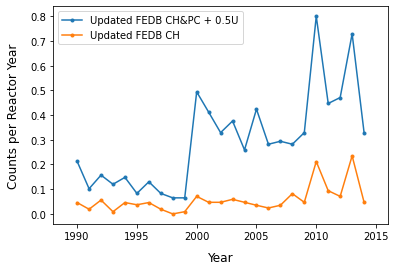

In [151]:
#df_cr2 = df_cr_copy.loc[1990:2009]
ax = df_cr_copy.plot(y=['Updated FEDB CH&PC + 0.5U', 'Updated FEDB CH'], style='.-')
ax.set_xlim(1988,2016)
#ax.set_ylim(0, 0.08)
ax.set_ylabel('Counts per Reactor Year', labelpad=10, fontsize=12)
ax.set_xlabel('Year', labelpad=10, fontsize=12)
# ax.set_title('Counts per Reactor Year for CH and PC-CH Fire Events (1990-09)', fontsize=12, y=1.1)
plt.savefig(sys_up_dplo + 'Counts per Reactor Year for CH and PC-CH Fire Events (1990-14)', bbox_inches='tight')
plt.show()

In [156]:
EPRI_up.shape

(2111, 70)

In [168]:
EPRI_cp = EPRI_up[['FireID','Combustible Group', 'Building', 'Fire Type',
                   'Fire Cause', 'Component Group', 'System', 'Disposition_FES',
                  'Type', 'Form']]

In [169]:
EPRI_cp = EPRI_cp.set_index('FireID')

In [170]:
EPRI_cp['Combustible Group'] = EPRI_cp['Combustible Group'].astype('category').cat.codes
EPRI_cp['Building'] = EPRI_cp['Building'].astype('category').cat.codes
EPRI_cp['Fire Type'] = EPRI_cp['Fire Type'].astype('category').cat.codes
EPRI_cp['Fire Cause'] = EPRI_cp['Fire Cause'].astype('category').cat.codes
EPRI_cp['Component Group'] = EPRI_cp['Component Group'].astype('category').cat.codes
EPRI_cp['System'] = EPRI_cp['System'].astype('category').cat.codes
EPRI_cp['Disposition_FES'] = EPRI_cp['Disposition_FES'].astype('category').cat.codes
EPRI_cp['Type'] = EPRI_cp['Type'].astype('category').cat.codes
EPRI_cp['Form'] = EPRI_cp['Form'].astype('category').cat.codes

In [171]:
EPRI_corr_matrix = EPRI_cp.corr()

In [172]:
EPRI_corr_matrix['Disposition_FES'].sort_values(ascending=False)

Disposition_FES      1.000000
System               0.103405
Building             0.050937
Form                 0.028361
Type                 0.021798
Fire Cause          -0.017684
Combustible Group   -0.034582
Fire Type           -0.061871
Component Group     -0.085914
Name: Disposition_FES, dtype: float64